# IMPORTING DATA

In [1]:
import csv
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport #https://pandas-profiling.github.io/pandas-profiling/docs/master/index.html
#import qgrid

import pingouin as pg
import scipy
from pca import pca #pip install pca https://github.com/erdogant/pca

import ast #Tranfromer un dictioner

/home/chispitas/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## STYLE Graph

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None) #Montrer toutes les colonnes

#using the style 
plt.style.use('seaborn-ticks')
plt.style.use('seaborn-notebook') 
plt.style.use('seaborn-poster') 
plt.rcParams["figure.figsize"] = [6, 5]

#Width
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

#Legend
plt.rcParams['legend.loc'] = 'center left'
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.edgecolor'] = 'black'
plt.rcParams['legend.facecolor'] = 'w'
plt.rcParams['legend.markerscale'] = 3

#Scatter marker
plt.rcParams['scatter.marker'] = '.'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

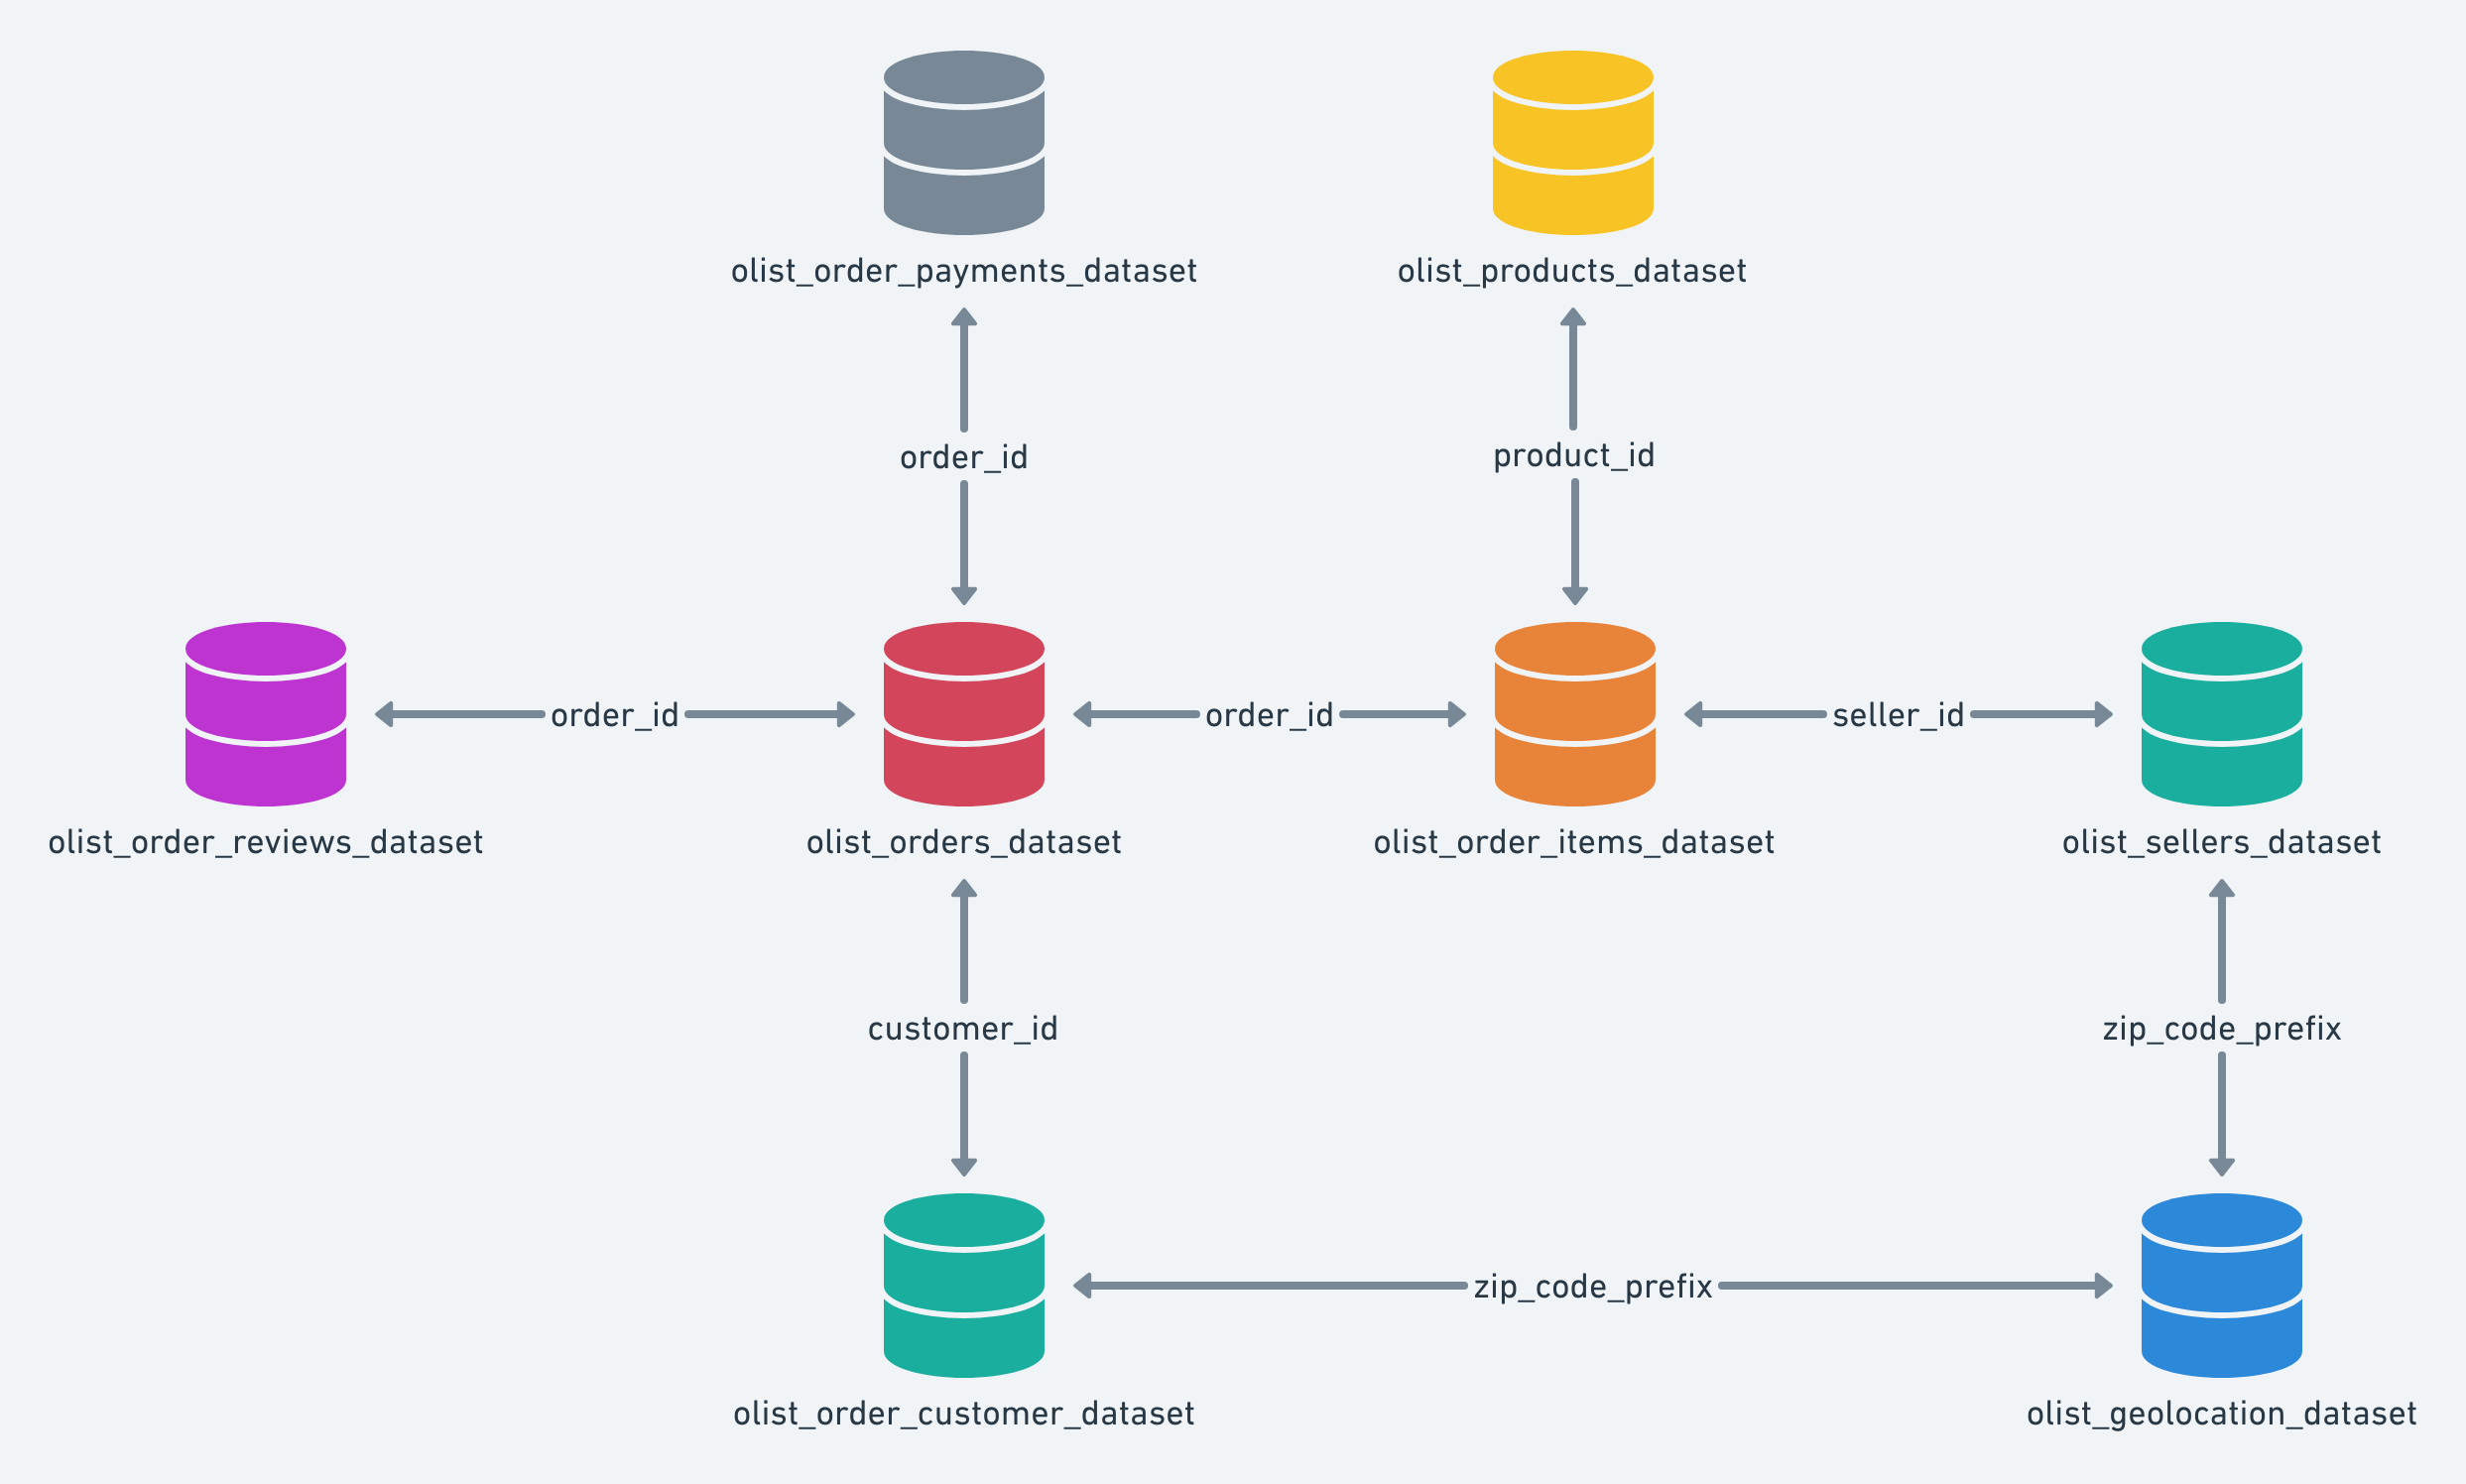

In [3]:
direc0 = '/media/chispitas/DATOS/Documento/Estudios/DataScientist/Projecto/P5-Segmentez des clients dun site e-commerce/Git/DATA/'

dir_product_category_name_translation = direc0 + 'product_category_name_translation.csv'
dir_sellers = direc0 + 'olist_sellers_dataset.csv'
dir_products = direc0 + 'olist_products_dataset.csv'
dir_orders = direc0 + 'olist_orders_dataset.csv'
dir_order_reviews = direc0 + 'olist_order_reviews_dataset.csv'
dir_order_items = direc0 + 'olist_order_items_dataset.csv'
dir_geolocation = direc0 + 'olist_geolocation_dataset.csv'
dir_customers = direc0 + 'olist_customers_dataset.csv'

ldir = [dir_sellers, dir_products, dir_product_category_name_translation, dir_orders, dir_order_reviews, dir_order_items, dir_geolocation, dir_customers]
ldf= ['df_sellers', 'df_products', 'df_product_category_name_translation', 'df_orders', 'df_order_reviews', 'df_order_items', 'df_geolocation', 'df_customers']

In [4]:
#ldf_TAUX = [i + '_TAUX' for i in ldf]
#locals()['strg%s' % n] = 'Hello'
for d in ldf: 
    c = ldf.index(d) #df
    # df_sellers = pd.read_csv(df_sellers, encoding='utf-8').convert_dtypes()
    locals()[d] = pd.read_csv(ldir[c], encoding='utf-8').convert_dtypes() #, delimiter='\t''
    eval(d).name = d #DFs name

#pandas_profiling
for d in set(ldf).difference([]):
    print(d) 
    #profile = ProfileReport(eval(d), title=d, minimal=False)
    profile = ProfileReport(eval(d), title=d, explorative=True)
    d = d + "_1_deep.html"
    profile.to_file(d)

# DATA PREPARATION

## Features

In [5]:
df_geolocation = df_geolocation.rename(columns = {'geolocation_zip_code_prefix':'geo_code'})
df_sellers = df_sellers.rename(columns = {'seller_zip_code_prefix':'geo_code'})
df_customers = df_customers.rename(columns = {'customer_zip_code_prefix':'geo_code'})

## Shape

In [6]:
#for d in set(ldf).difference([]):
for d in ldf:
    print(d, eval(d).shape) 

df_sellers (3095, 4)
df_products (32951, 9)
df_product_category_name_translation (71, 2)
df_orders (99441, 8)
df_order_reviews (100000, 7)
df_order_items (112650, 7)
df_geolocation (1000163, 5)
df_customers (99441, 5)


## DATA cleaning

### Errors from data entry

#### Lowercase

In [7]:
def lowercases(df):
    for c in df.select_dtypes(exclude=[np.number]).columns:
        df[c] = df[c].str.lower()
        df[c] = df[c].str.strip(' ')
        #NEWc = c.str.lower().strip(' ').replace(' ', '_').replace('(', '_').replace(')', '')
        NEWc = c.lower().strip(' ').replace(' ', '_').replace('(', '_').replace(')', '')
        df = df.rename(columns = {c:NEWc})

    return df

In [8]:
for d in ldf: 
    c = ldf.index(d) #Parametres of model
    locals()[d] = lowercases(eval(d))
    #df_sellers = lowercases(df_sellers)
df_sellers

,seller_id,geo_code,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,sp
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,sp
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,rj
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,sp
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,sp
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,pr
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,sc
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,sp
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,rs


#### Duplicate

In [9]:
for df in ldf: 
    i = ldf.index(d) #df
    print(df)
    print(eval(df).shape)
    #df_orders = df_orders.drop_duplicates()
    locals()[df] = eval(df).drop_duplicates()
    print(eval(df).shape)

df_sellers
(3095, 4)
(3095, 4)
df_products
(32951, 9)
(32951, 9)
df_product_category_name_translation
(71, 2)
(71, 2)
df_orders
(99441, 8)
(99441, 8)
df_order_reviews
(100000, 7)
(100000, 7)
df_order_items
(112650, 7)
(112650, 7)
df_geolocation
(1000163, 5)
(738332, 5)
df_customers
(99441, 5)
(99441, 5)


In [10]:
print(df_geolocation.shape)
df_geolocation = df_geolocation.drop_duplicates(subset=['geo_code'])
print(df_geolocation.shape)

#1 Only order
print(df_products.shape)
df_products = df_products.drop_duplicates(subset=['product_id'])
print(df_products.shape)

print(df_order_reviews.shape)
df_order_reviews = df_order_reviews.drop_duplicates(subset=['order_id'])
print(df_order_reviews.shape)

print(df_order_items.shape)
df_order_items = df_order_items.drop_duplicates(subset=['order_id'])
print(df_order_items.shape)

(738332, 5)
(19015, 5)
(32951, 9)
(32951, 9)
(100000, 7)
(99441, 7)
(112650, 7)
(98666, 7)


### Physically impossible values

In [11]:
df_products.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [12]:
print(df_products.shape)
df_products2 = df_products[df_products['product_weight_g']>2]
df_products2 = df_products2[df_products2['product_length_cm']>1]
df_products2 = df_products2[df_products2['product_height_cm']>1]
df_products2 = df_products2[df_products2['product_width_cm']>1]

print(df_products2.shape)


(32951, 9)
(32940, 9)


### Missing values

#### Duplicates

In [13]:
for d in ldf:

    print(d)
    print(eval(d).shape)
    locals()[d] = eval(d).drop_duplicates()
    print(eval(d).shape)
    print('----')

df_sellers
(3095, 4)
(3095, 4)
----
df_products
(32951, 9)
(32951, 9)
----
df_product_category_name_translation
(71, 2)
(71, 2)
----
df_orders
(99441, 8)
(99441, 8)
----
df_order_reviews
(99441, 7)
(99441, 7)
----
df_order_items
(98666, 7)
(98666, 7)
----
df_geolocation
(19015, 5)
(19015, 5)
----
df_customers
(99441, 5)
(99441, 5)
----


In [14]:
def MissingValues(df):
    dfDESCRIPTION = df.describe(include='all')
    dfTAUX = dfDESCRIPTION.T
    LEN = len(df)
    dfTAUX['%full'] = (dfTAUX['count']/LEN)*100
    dfTAUX['%unique'] = (1-dfTAUX['unique']/dfTAUX['count'])*100
    dfTAUX.drop(['top'], axis=1,inplace = True)
    dfTAUX.sort_values('%full', ascending = True ,inplace = True)
    return dfTAUX

In [15]:
for d in ldf: 
    #df_sellers_TAUX = MissingValues(df_sellers)
    locals()[d+'_TAUX'] = MissingValues(eval(d).select_dtypes(exclude='datetime'))

    #df_sellers_TAUX2 = pd.concat([df_sellers_TAUX], keys=['df_sellers'], names=['dfs'], axis = 0)
    locals()[d+'_TAUX2'] = pd.concat([eval(d+'_TAUX')], keys=[d], names=['dfs'], axis = 0)
ldf_TAUX2 = [i+'_TAUX2' for i in ldf]
ldf_TAUX = [i + '_TAUX' for i in ldf]

In [16]:
df_TAUX2 = pd.concat([df_sellers_TAUX2,df_products_TAUX2,
                      df_products_TAUX2,                     
                      df_product_category_name_translation_TAUX2,
                      df_orders_TAUX2,
                      df_order_reviews_TAUX2,df_order_items_TAUX2,
                      df_order_items_TAUX2,
                      df_geolocation_TAUX2,
                      df_customers_TAUX2
                     ], axis = 0)


In [17]:
df_TAUX2.sort_values('%full', ascending = True ,inplace = True)
df_TAUX2.loc[:,['count', 'unique', 'freq', 'mean', 'std', 'min', 'max', '%full', '%unique']].head(60)
#df_TAUX2[['count', 'unique', 'freq', 'mean', 'std', 'min', 'max', '%full', '%unique']].style.format('{0:,.1f}').background_gradient(subset=['count', 'unique', 'freq', 'mean', 'std', 'min', 'max', '%full', '%unique'])

count  \
dfs                                                                           
df_order_reviews                     review_comment_title             11697   
                                     review_comment_message           41555   
df_orders                            order_delivered_customer_date    96476   
df_products                          product_name_lenght            32341.0   
                                     product_category_name            32341   
                                     product_name_lenght            32341.0   
                                     product_description_lenght     32341.0   
                                     product_photos_qty             32341.0   
                                     product_category_name            32341   
                                     product_photos_qty             32341.0   
                                     product_description_lenght     32341.0   
df_orders                            order_delivered_carrier_date     97658   
                                     order_approved_at                99281   
df_products                          product_height_cm              32949.0   
                                     product_length_cm              32949.0   
                                     product_weight_g               32949.0   
                                     product_width_cm               32949.0   
                                     product_width_cm               32949.0   
                                     product_height_cm              32949.0   
                                     product_length_cm              32949.0   
                                     product_weight_g               32949.0   
df_order_items                       order_item_id                  98666.0   
                                     product_id                       98666   
                                     seller_id                        98666   
                                     order_id                         98666   
                                     freight_value                  98666.0   
                                     price                          98666.0   
                                     shipping_limit_date              98666   
                                     price                          98666.0   
df_sellers                           seller_id                         3095   
df_geolocation                       geo_code                       19015.0   
                                     geolocation_lat                19015.0   
                                     geolocation_lng                19015.0   
                                     geolocation_city                 19015   
df_order_items                       shipping_limit_date              98666   
df_geolocation                       geolocation_state                19015   
df_customers                         customer_id                      99441   
                                     customer_unique_id               99441   
                                     geo_code                       99441.0   
df_order_items                       freight_value                  98666.0   
                                     seller_id                        98666   
df_orders                            order_estimated_delivery_date    99441   
df_order_items                       order_item_id                  98666.0   
df_sellers                           geo_code                        3095.0   
                                     seller_city                       3095   
                                     seller_state                      3095   
df_products                          product_id                       32951   
                                     product_id                       32951   
df_product_category_name_translation product_category_name               71   
                                     prod

In [18]:
df_sellers = df_sellers.dropna()
df_products = df_products.dropna()
df_product_category_name_translation = df_product_category_name_translation.dropna()
df_orders = df_orders.dropna()
df_order_reviews[df_order_reviews.columns.difference(['review_comment_message', 'review_comment_title'])] = df_order_reviews[df_order_reviews.columns.difference(['review_comment_message', 'review_comment_title'])].dropna()
df_order_items = df_order_items.dropna()
df_geolocation = df_geolocation.dropna()
df_customers = df_customers.dropna()

In [19]:
df_order_reviews = df_order_reviews.drop(['review_comment_message', 'review_comment_title'], axis=1)

In [20]:
for d in ldf: 
    #df_sellers_TAUX = MissingValues(df_sellers)
    locals()[d+'_TAUX'] = MissingValues(eval(d).select_dtypes(exclude='datetime'))
    #df_sellers_TAUX2 = pd.concat([df_sellers_TAUX], keys=['df_sellers'], names=['dfs'], axis = 0)
    locals()[d+'_TAUX2'] = pd.concat([eval(d+'_TAUX')], keys=[d], names=['dfs'], axis = 0)
ldf_TAUX2 = [i+'_TAUX2' for i in ldf]
ldf_TAUX = [i + '_TAUX' for i in ldf]

In [21]:
df_TAUX2 = pd.concat([df_sellers_TAUX2,df_products_TAUX2,
                      df_products_TAUX2,                     
                      df_product_category_name_translation_TAUX2,
                      df_orders_TAUX2,
                      df_order_reviews_TAUX2,df_order_items_TAUX2,
                      df_order_items_TAUX2,
                      df_geolocation_TAUX2,
                      df_customers_TAUX2
                     ], axis = 0)


In [22]:
df_TAUX2.sort_values('%full', ascending = True ,inplace = True)
df_TAUX2.loc[:,['count', 'unique', 'freq', 'mean', 'std', 'min', 'max', '%full', '%unique']].head(60)
#df_TAUX2[['count', 'unique', 'freq', 'mean', 'std', 'min', 'max', '%full', '%unique']].style.format('{0:,.1f}').background_gradient(subset=['count', 'unique', 'freq', 'mean', 'std', 'min', 'max', '%full', '%unique'])

count  \
dfs                                                                           
df_sellers                           seller_id                         3095   
df_order_reviews                     review_id                        99441   
                                     order_id                         99441   
                                     review_score                   99441.0   
                                     review_creation_date             99441   
                                     review_answer_timestamp          99441   
df_order_items                       order_id                         98666   
                                     order_item_id                  98666.0   
                                     product_id                       98666   
                                     seller_id                        98666   
                                     shipping_limit_date              98666   
                                     price                          98666.0   
                                     freight_value                  98666.0   
                                     order_id                         98666   
                                     order_item_id                  98666.0   
                                     product_id                       98666   
                                     seller_id                        98666   
                                     shipping_limit_date              98666   
                                     price                          98666.0   
                                     freight_value                  98666.0   
df_geolocation                       geo_code                       19015.0   
                                     geolocation_lat                19015.0   
                                     geolocation_lng                19015.0   
                                     geolocation_city                 19015   
                                     geolocation_state                19015   
df_customers                         customer_id                      99441   
                                     customer_unique_id               99441   
                                     geo_code                       99441.0   
df_orders                            order_estimated_delivery_date    96461   
df_customers                         customer_city                    99441   
df_orders                            order_delivered_customer_date    96461   
                                     order_approved_at                96461   
df_sellers                           geo_code                        3095.0   
                                     seller_city                       3095   
                                     seller_state                      3095   
df_products                          product_id                       32340   
                                     product_category_name            32340   
                                     product_name_lenght            32340.0   
                                     product_description_lenght     32340.0   
                                     product_photos_qty             32340.0   
                                     product_weight_g               32340.0   
                                     product_length_cm              32340.0   
                                     product_height_cm              32340.0   
                                     product_width_cm               32340.0   
                                     product_id                       32340   
                                     product_category_name            32340   
                                     product_name_lenght            32340.0   
                                     product_description_lenght     32340.0   
                                     product_photos_qty             32340.0   
                                     prod

In [ ]:
MissingValues(df_order_reviews)[['count', 'unique', 'freq', 'mean', 'std', 'min', 'max', '%full', '%unique']].style.format('{0:,.1f}').background_gradient(subset=['count', 'unique', 'freq', 'mean', 'std', 'min', 'max', '%full', '%unique'])

### Outliers

In [ ]:
df_orders = df_orders[df_orders['order_status']=='delivered']
df_orders = df_orders.drop('order_status', axis=1)
df_orders.columns

In [ ]:
def Outliers(dfSET,names):
    plt.style.use('seaborn-notebook') 

    lVARS = dfSET.select_dtypes(include=[np.number]).columns.difference([])
    lVARS = dfSET.loc[:,lVARS].describe(include='all').T.sort_values('max', ascending = False).index #Les variables organiser par le plus grandes aux plus petites

    nc = 2
    nf = 20

    fig = plt.figure(figsize=(7*nc, 7*nf))
    plt.subplots_adjust(wspace=0.2, hspace=0.2) #interspace entre graphiques

    cc = -1
    for c in lVARS:
        cc = cc + 1

        ax = fig.add_subplot(nf, nc, (cc+1))
        ax = sns.boxplot(y=dfSET[c], showfliers=True, showmeans = True, ax = ax)
        ax.set_title(c)
        ax.set_ylabel('')
        ax.set_xlabel('')
        #ax.set_xscale('symlog', linthresh=10000000)
    plt.show()
    fig.savefig(direc0 + '32-Outliers_'+names+'_.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')


In [ ]:
for df in set(ldf).difference(['df_product_category_name_translation','df_orders']) :
    print(df)
    Outliers(eval(df), df)

In [ ]:
df_products.columns

In [ ]:
quartil = df_products['product_weight_g'].describe(percentiles=[0.8]).iloc[5]
df_products['product_weight_g']=df_products['product_weight_g'][df_products['product_weight_g']<quartil]
print(quartil)

quartil = df_products['product_length_cm'].describe(percentiles=[0.97]).iloc[5]
df_products['product_length_cm']=df_products['product_length_cm'][df_products['product_length_cm']<quartil]
print(quartil)

quartil = df_products['product_width_cm'].describe(percentiles=[0.96]).iloc[5]
df_products['product_width_cm']=df_products['product_width_cm'][df_products['product_width_cm']<quartil]
print(quartil)

quartil = df_products['product_height_cm'].describe(percentiles=[0.95]).iloc[5]
df_products['product_height_cm']=df_products['product_height_cm'][df_products['product_height_cm']<quartil]
print(quartil)

quartil = df_order_items['price'].describe(percentiles=[0.9]).iloc[5]
df_order_items['price']=df_order_items['price'][df_order_items['price']<quartil]
print(quartil)

quartil = df_order_items['freight_value'].describe(percentiles=[0.85]).iloc[5]
df_order_items['freight_value']=df_order_items['freight_value'][df_order_items['freight_value']<quartil]
print(quartil)

In [ ]:
for df in set(ldf).difference(['df_product_category_name_translation','df_orders']) :
    print(df)
    Outliers(eval(df), df)

### Spaces, typos, ...

### Errorrs against codebook

## DATA Transformation

### Aggregating data

### Extrapolating data

### Derived measures

In [ ]:
df_products['volume_cm3'] =  df_products['product_length_cm'] *  df_products['product_height_cm'] * df_products['product_width_cm']
df_products = df_products.drop(['product_length_cm','product_height_cm','product_width_cm'], axis=1)
df_products['volume_cm3'].describe()

In [ ]:
df_products.columns

In [ ]:
np.linspace(1,5,5)

In [ ]:
df_products['volume_cat'] = 1
df_products['weight_cat'] = 1
df_products['product_name_lenght_cat'] = 1
df_products['product_description_lenght_cat'] = 1
df_products['product_photos_qty_cat'] = 1

nbr_cat= 5

for q in np.linspace(1,nbr_cat,nbr_cat):
    quartil = df_products['volume_cm3'].describe(percentiles=[q/nbr_cat]).iloc[5]
    df_products['volume_cat'][df_products['volume_cm3']>quartil] = q
    
    quartil = df_products['product_weight_g'].describe(percentiles=[q/nbr_cat]).iloc[5]
    df_products['weight_cat'][df_products['product_weight_g']>quartil] = q
    
    quartil = df_products['product_name_lenght'].describe(percentiles=[q/nbr_cat]).iloc[5]
    df_products['product_name_lenght_cat'][df_products['product_name_lenght']>quartil] = q
    
    quartil = df_products['product_description_lenght'].describe(percentiles=[q/nbr_cat]).iloc[5]
    df_products['product_description_lenght_cat'][df_products['product_description_lenght']>quartil] = q
    
    quartil = df_products['product_photos_qty'].describe(percentiles=[q/nbr_cat]).iloc[5]
    df_products['product_photos_qty_cat'][df_products['product_photos_qty']>quartil] = q
    
df_products = df_products.drop(['product_weight_g'], axis=1)
df_products = df_products.drop(['volume_cm3'], axis=1)
df_products = df_products.drop(['product_name_lenght'], axis=1)
df_products = df_products.drop(['product_description_lenght'], axis=1)
df_products = df_products.drop(['product_photos_qty'], axis=1)

#### Datatime

In [ ]:
df_orders.head(5)

In [ ]:
df_order_reviews.dtypes

In [ ]:
df_order_reviews.head(5)

In [ ]:
for c in ['order_purchase_timestamp', 'order_delivered_customer_date']:
    df_orders[c] = pd.to_datetime(df_orders[c], format='%Y-%m-%d %H:%M:%S')
    df_orders['Year'] = df_orders[c].dt.year
    df_orders[c+'_M'] = df_orders[c].dt.month
    df_orders[c+'_W'] = df_orders[c].dt.day_of_week #Monday=0, Sunday=6
    df_orders[c+'_H'] = df_orders[c].dt.hour
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'], format='%Y-%m-%d %H:%M:%S')
df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders['order_delivered_carrier_date'], format='%Y-%m-%d %H:%M:%S')
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'], format='%Y-%m-%d %H:%M:%S')

df_order_reviews['review_creation_date'] = pd.to_datetime(df_order_reviews['review_creation_date'], format='%Y-%m-%d %H:%M:%S')
df_order_reviews['review_answer_timestamp'] = pd.to_datetime(df_order_reviews['review_answer_timestamp'], format='%Y-%m-%d %H:%M:%S')

df_orders = df_orders.convert_dtypes()
df_order_reviews = df_order_reviews.convert_dtypes()
df_orders.dtypes

In [ ]:
df_orders['order_purchase_timestamp_M_cat'] = 'Nov-Jan'
df_orders['order_purchase_timestamp_M_cat'][df_orders['order_purchase_timestamp_M']>=2] = 'Feb-May'
df_orders['order_purchase_timestamp_M_cat'][df_orders['order_purchase_timestamp_M']>=5] = 'Jun-Aug'
df_orders['order_purchase_timestamp_M_cat'][df_orders['order_purchase_timestamp_M']>=9] = 'Sep-Oct'
df_orders['order_purchase_timestamp_M_cat'][df_orders['order_purchase_timestamp_M']>=10] = 'Nov-Jan'
df_orders

In [ ]:
df_orders['order_purchase_timestamp_W_cat'] = 'Week'
df_orders['order_purchase_timestamp_W_cat'][df_orders['order_purchase_timestamp_W']>=5] = 'Weekend'
df_orders

In [ ]:
df_orders['o_purchase_time_H_cat'] = '23-7'
df_orders['o_purchase_time_H_cat'][df_orders['order_purchase_timestamp_H']>=7] = '7-12'
df_orders['o_purchase_time_H_cat'][df_orders['order_purchase_timestamp_H']>=12] = '12-14'
df_orders['o_purchase_time_H_cat'][df_orders['order_purchase_timestamp_H']>=14] = '14-18'
df_orders['o_purchase_time_H_cat'][df_orders['order_purchase_timestamp_H']>=18] = '18-23'
df_orders['o_purchase_time_H_cat'][df_orders['order_purchase_timestamp_H']>=23] = '23-7'
df_orders

In [ ]:
df_orders['o_purchase_time_H_cat'].unique()

In [ ]:
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days) 

In [ ]:
df_orders['real_delivered_time'] = df_orders['order_delivered_customer_date'] - df_orders['order_purchase_timestamp']
df_orders['real_estimated_delivered_time'] = df_orders['order_estimated_delivery_date'] - df_orders['order_purchase_timestamp']
df_orders['late_days'] = df_orders['real_estimated_delivered_time'] - df_orders['real_delivered_time']

df_orders['real_delivered_time'] = df_orders['real_delivered_time'].astype("timedelta64[D]")
df_orders['real_estimated_delivered_time'] = df_orders['real_estimated_delivered_time'].astype("timedelta64[D]")
df_orders['late_days'] = df_orders['late_days'].astype("timedelta64[D]")

df_orders = df_orders.convert_dtypes()

df_orders

In [ ]:
df_orders.dtypes

In [45]:
df_orders['o_purchase_time_H_cat'].unique()

<StringArray>
['7-12', '18-23', '12-14', '14-18', '23-7']
Length: 5, dtype: string

### creating dummies

### Reducing number of variables

### Translation category

In [46]:
df_products['product_category_name'].sample(3)

26044                cama_mesa_banho
31385               malas_acessorios
9730     fashion_bolsas_e_acessorios
Name: product_category_name, dtype: string

In [47]:
df_product_category_name_translation.head(3)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


In [48]:
print(df_products.shape)
df_products = pd.merge(df_products, df_product_category_name_translation, how='left', on='product_category_name')
df_products = df_products.drop('product_category_name', axis=1)
print(df_products.shape)

(32340, 7)
(32340, 7)


In [49]:
df_products.head(3)

,product_id,volume_cat,weight_cat,product_name_lenght_cat,product_description_lenght_cat,product_photos_qty_cat,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,1,1,1,1,1,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,3,3,1,1,1,art
2,96bd76ec8810374ed1b65e291975717f,1,1,1,1,1,sports_leisure


## COMBINING data

### Merging/joing data sets

In [50]:
ldf

['df_sellers',
 'df_products',
 'df_product_category_name_translation',
 'df_orders',
 'df_order_reviews',
 'df_order_items',
 'df_geolocation',
 'df_customers']

In [51]:
df_customers.columns

Index(['customer_id', 'customer_unique_id', 'geo_code', 'customer_city',
       'customer_state'],
      dtype='object')

In [52]:
df_orders.dtypes

order_id                                   string
customer_id                                string
order_purchase_timestamp           datetime64[ns]
order_approved_at                  datetime64[ns]
order_delivered_carrier_date       datetime64[ns]
order_delivered_customer_date      datetime64[ns]
order_estimated_delivery_date      datetime64[ns]
Year                                        Int64
order_purchase_timestamp_M                  Int64
order_purchase_timestamp_W                  Int64
order_purchase_timestamp_H                  Int64
order_delivered_customer_date_M             Int64
order_delivered_customer_date_W             Int64
order_delivered_customer_date_H             Int64
order_purchase_timestamp_M_cat             string
order_purchase_timestamp_W_cat             string
o_purchase_time_H_cat                      string
real_delivered_time                         Int64
real_estimated_delivered_time               Int64
late_days                                   Int64


In [53]:
df_customers

,customer_id,customer_unique_id,geo_code,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,sp
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,sp
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,sp
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,sp
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,sp
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,sp
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,sp
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,ce
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,rs


In [54]:
df_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.9,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,<NA>,<NA>
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,<NA>,<NA>
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.9,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [55]:
print('df_customers')
print('df_orders')
print(df_customers.shape)
dfTOTAL = pd.merge(df_customers, df_orders, how='left', on='customer_id')
print(dfTOTAL.shape)

print('df_order_reviews')
dfTOTAL = pd.merge(dfTOTAL, df_order_reviews, how='left', on='order_id')
print(dfTOTAL.shape)

print('df_order_items')
dfTOTAL = pd.merge(dfTOTAL, df_order_items, how='left', on='order_id')
print(dfTOTAL.shape)

print('df_products')
dfTOTAL = pd.merge(dfTOTAL, df_products, how='left', on='product_id')
print(dfTOTAL.shape)

print('df_sellers')
dfTOTAL = pd.merge(dfTOTAL, df_sellers, how='left', on=['seller_id', 'geo_code'])
print(dfTOTAL.shape)

print('df_geolocation')
dfTOTAL = pd.merge(dfTOTAL, df_geolocation, how='left', on='geo_code')
print(dfTOTAL.shape)

#dfTOTAL = dfTOTAL.set_index('customer_unique_id')
dfTOTAL = dfTOTAL.convert_dtypes()
dfTOTAL.dtypes

df_customers
df_orders
(99441, 5)
(99441, 24)
df_order_reviews
(99441, 28)
df_order_items
(99441, 34)
df_products
(99441, 40)
df_sellers
(99441, 42)
df_geolocation
(99441, 46)


customer_id                                string
customer_unique_id                         string
geo_code                                    Int64
customer_city                              string
customer_state                             string
order_id                                   string
order_purchase_timestamp           datetime64[ns]
order_approved_at                  datetime64[ns]
order_delivered_carrier_date       datetime64[ns]
order_delivered_customer_date      datetime64[ns]
order_estimated_delivery_date      datetime64[ns]
Year                                        Int64
order_purchase_timestamp_M                  Int64
order_purchase_timestamp_W                  Int64
order_purchase_timestamp_H                  Int64
order_delivered_customer_date_M             Int64
order_delivered_customer_date_W             Int64
order_delivered_customer_date_H             Int64
order_purchase_timestamp_M_cat             string
order_purchase_timestamp_W_cat             string


In [56]:
dfTOTAL['o_purchase_time_H_cat'].unique()

<StringArray>
['14-18', '18-23', '7-12', '12-14', '23-7', <NA>]
Length: 6, dtype: string

#### Missing values

In [57]:
MissingValues(dfTOTAL)[['count', 'unique', 'freq', 'mean', 'std', 'min', 'max', '%full', '%unique']].style.format('{0:,.1f}').background_gradient(subset=['count', 'unique', 'freq', 'mean', 'std', 'min', 'max', '%full', '%unique'])

/tmp/ipykernel_24176/4131469734.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dfDESCRIPTION = df.describe(include='all')
/tmp/ipykernel_24176/4131469734.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dfDESCRIPTION = df.describe(include='all')


,count,unique,freq,mean,std,min,max,%full,%unique
seller_state,23.0,7.0,9.0,nan,nan,nan,nan,0.0,69.6
seller_city,23.0,15.0,4.0,nan,nan,nan,nan,0.0,34.8
freight_value,"82,042.0",nan,nan,15.5,4.7,0.0,26.8,82.5,nan
price,"86,919.0",nan,nan,82.4,54.2,0.8,240.0,87.4,nan
product_category_name_english,"95,077.0",71.0,"9,166.0",nan,nan,nan,nan,95.6,99.9
product_photos_qty_cat,"95,096.0",nan,nan,2.0,1.2,1.0,4.0,95.6,nan
product_description_lenght_cat,"95,096.0",nan,nan,2.1,1.2,1.0,4.0,95.6,nan
weight_cat,"95,096.0",nan,nan,1.9,1.2,1.0,4.0,95.6,nan
product_name_lenght_cat,"95,096.0",nan,nan,2.1,1.2,1.0,4.0,95.6,nan
volume_cat,"95,096.0",nan,nan,1.9,1.2,1.0,4.0,95.6,nan


In [58]:
dfTOTAL = dfTOTAL.drop(['seller_state', 'seller_city'], axis=1)
dfTOTAL = dfTOTAL.dropna()

In [59]:
MissingValues(dfTOTAL)[['count', 'unique', 'freq', 'mean', 'std', 'min', 'max', '%full', '%unique']].style.format('{0:,.1f}').background_gradient(subset=['count', 'unique', 'freq', 'mean', 'std', 'min', 'max', '%full', '%unique'])

/tmp/ipykernel_24176/4131469734.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dfDESCRIPTION = df.describe(include='all')
/tmp/ipykernel_24176/4131469734.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dfDESCRIPTION = df.describe(include='all')


,count,unique,freq,mean,std,min,max,%full,%unique
customer_id,"75,286.0","75,286.0",1.0,nan,nan,nan,nan,100.0,0.0
review_id,"75,286.0","74,947.0",3.0,nan,nan,nan,nan,100.0,0.5
review_score,"75,286.0",nan,nan,4.2,1.3,1.0,5.0,100.0,nan
review_creation_date,"75,286.0",620.0,375.0,nan,nan,nan,nan,100.0,99.2
review_answer_timestamp,"75,286.0","74,847.0",4.0,nan,nan,nan,nan,100.0,0.6
order_item_id,"75,286.0",nan,nan,1.0,0.0,1.0,1.0,100.0,nan
product_id,"75,286.0","24,292.0",414.0,nan,nan,nan,nan,100.0,67.7
seller_id,"75,286.0","2,560.0","1,741.0",nan,nan,nan,nan,100.0,96.6
shipping_limit_date,"75,286.0","71,792.0",6.0,nan,nan,nan,nan,100.0,4.6
late_days,"75,286.0",nan,nan,10.7,9.7,-189.0,146.0,100.0,nan


In [60]:
dfTOTAL

,customer_id,customer_unique_id,geo_code,customer_city,customer_state,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year,order_purchase_timestamp_M,order_purchase_timestamp_W,order_purchase_timestamp_H,order_delivered_customer_date_M,order_delivered_customer_date_W,order_delivered_customer_date_H,order_purchase_timestamp_M_cat,order_purchase_timestamp_W_cat,o_purchase_time_H_cat,real_delivered_time,real_estimated_delivered_time,late_days,review_id,review_score,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,volume_cat,weight_cat,product_name_lenght_cat,product_description_lenght_cat,product_photos_qty_cat,product_category_name_english,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,sp,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017,5,1,15,5,3,10,Jun-Aug,Week,14-18,8,19,10,88b8b52d46df026a9d1ad2136a59b30b,4,2017-05-26,2017-05-30 22:34:40,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1,1,1,4,1,office_furniture,-20.509897,-47.397866,franca,sp
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,sp,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018,5,5,16,6,3,17,Jun-Aug,Weekend,14-18,26,24,-2,5ad6695d76ee186dc473c42706984d87,5,2018-06-15,2018-06-15 12:10:59,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,1,1,3,3,1,office_furniture,-23.527788,-46.66031,sao paulo,sp
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,sp,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018,3,1,16,3,2,16,Feb-May,Week,14-18,14,27,12,059a801bb31f6aab2266e672cab87bc5,5,2018-03-29,2018-04-02 18:36:47,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,1,1,1,3,1,office_furniture,-23.49693,-46.185352,mogi das cruzes,sp
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,sp,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018,7,6,9,8,3,20,Jun-Aug,Weekend,7-12,11,16,5,8490879d58d6c5d7773f2739a03f089a,5,2018-08-10,2018-08-17 01:59:52,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.0,22.25,4,1,4,1,1,home_confort,-22.987222,-47.151073,campinas,sp
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,sp,36e694cf4cbc2a4803200c35e84abdc4,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,2018-02-20 16:25:51,2018-03-05,2018,2,0,14,2,1,16,Feb-May,Week,14-18,1,13,12,bc88d3b86fa8443d42894eb7b5f0d73c,5,2018-02-21,2018-02-26 13:53:18,1,b5466db4cecf95c3c1be0ba32538ce1a,9f505651f4a6abe901a56cdc21508025,2018-02-23 14:50:37,14.99,7.78,1,1,1,1,3,computers_accessories,-23.584547,-46.674561,sao paulo,sp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99435,7fe2e80252a9ea476f950ae8f85b0f8f,4b5820135d360a45552b5163835b1d89,35500,divinopolis,mg,c9aea907527f5d4f5fb44955c18a79fb,2017-12-17 23:13:41,2017-12-18 00:17:27,2017-12-20 18:52:08,2018-01-04 13:08:05,2018-01-23,2018,12,6,23,1,3,13,Nov-Jan,Weekend,23-7,17,36,18,41fbe3bbe59583791d750031d36cd67e,1,2018-01-05,2018-01-05 22:33:22,1,c770c3d5ab511e88a96d387bdb0b6ce0,e06f09ec0a4aca210779cf1cfc63cf19,2018-01-03 00:17:27,55.0,20.88,4,3,1,1,2,housewares,-20.146615,-44.892592,divinopolis,mg
99436,17ddf5dd5d5169

In [61]:
dfTOTAL2 = dfTOTAL.groupby(dfTOTAL['customer_unique_id'], as_index=False).agg(  
    customer_city_last=('customer_city','first'),  
    customer_state_last=('customer_state','first'),  
    order_purchase_timestamp_last=('order_purchase_timestamp','first'),  
    estimated_delivered_time_mean=('real_estimated_delivered_time','mean'), 
    review_score_mean=('review_score','mean'),  
    price_mean=('price','mean'),  
    price_sum=('price','sum'),
    item_number=('price','count'),
    freight_value=('freight_value','mean'),  
    freight_value_sum=('freight_value','sum'),  
    product_category_name=('product_category_name_english',set),
    product_name_lenght_cat_mean=('product_name_lenght_cat','mean'),  
    product_description_lenght_cat_mean=('product_description_lenght_cat','mean'),  
    geolocation_lat_last=('geolocation_lat','first'),  
    geolocation_lng_last=('geolocation_lng','first'),   
)

dfTOTAL2 = dfTOTAL2.set_index('customer_unique_id')
dfTOTAL2[dfTOTAL2['item_number']>2]

,customer_city_last,customer_state_last,order_purchase_timestamp_last,estimated_delivered_time_mean,review_score_mean,price_mean,price_sum,item_number,freight_value,freight_value_sum,product_category_name,product_name_lenght_cat_mean,product_description_lenght_cat_mean,geolocation_lat_last,geolocation_lng_last
customer_unique_id,,,,,,,,,,,,,,,
041caba6a63ace5818387698ea85cdb2,guarulhos,sp,2017-11-17 08:47:41,15.666667,4.666667,40.63,121.89,3,10.523333,31.57,"{auto, telephony, drinks}",2.0,1.666667,-23.462628,-46.553322
06a52782a04f0086d16b9c22d0e29438,dourados,ms,2017-05-06 20:11:10,26.0,5.0,35.0,105.0,3,16.11,48.33,{home_appliances},4.0,1.0,-22.220621,-54.796047
07b1b60bca2b6326fa2adb259ea4a55f,porto alegre,rs,2018-05-09 17:16:21,25.333333,4.333333,53.7,161.1,3,15.303333,45.91,"{furniture_decor, stationery}",1.333333,1.0,-30.068971,-51.155099
08c07c761592a71b85136aa4fe76a6f4,valente,ba,2018-01-26 22:03:52,32.333333,5.0,116.0,348.0,3,19.01,57.03,"{sports_leisure, health_beauty}",1.0,4.0,-11.411647,-39.463623
0b18593e033697810a62a987e77f4b8c,perdigao,mg,2017-06-02 09:18:44,39.0,5.0,46.566667,139.7,3,17.086667,51.26,"{bed_bath_table, housewares}",2.666667,1.666667,-19.956997,-45.073949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f64ec6d8dd29940264cd0bbb5ecade8a,petropolis,rj,2017-11-19 14:47:50,26.75,5.0,72.0,288.0,4,17.75,71.0,{housewares},2.5,2.75,-22.508252,-43.222267
fc719c11b4dce594f47e1f9aa739a3a2,sao paulo,sp,2017-12-26 21:57:46,20.333333,5.0,49.33,147.99,3,12.523333,37.57,"{sports_leisure, perfumery}",1.333333,3.0,-23.63156,-46.642583
fd8ccc89be43894d2553494c71a61fd8,niteroi,rj,2018-03-13 07:45:39,32.666667,4.666667,34.89,104.67,3,15.636667,46.91,"{bed_bath_table, housewares}",1.0,1.0,-22.896756,-43.099811


In [62]:
#Categorical features correction
dfTOTAL2['item_number'] = dfTOTAL2['item_number'].astype(float).round(0).convert_dtypes()
dfTOTAL2['product_name_lenght_cat_mean'] = dfTOTAL2['product_name_lenght_cat_mean'].astype(float).round(0).convert_dtypes()
dfTOTAL2['product_description_lenght_cat_mean'] = dfTOTAL2['product_description_lenght_cat_mean'].astype(float).round(0).convert_dtypes()
dfTOTAL2['estimated_delivered_time_mean'] = dfTOTAL2['estimated_delivered_time_mean'].astype(float).round(0).convert_dtypes()
dfTOTAL2['review_score_mean'] = dfTOTAL2['review_score_mean'].astype(float).round(0).convert_dtypes()

dfTOTAL2[dfTOTAL2['item_number']>2]

,customer_city_last,customer_state_last,order_purchase_timestamp_last,estimated_delivered_time_mean,review_score_mean,price_mean,price_sum,item_number,freight_value,freight_value_sum,product_category_name,product_name_lenght_cat_mean,product_description_lenght_cat_mean,geolocation_lat_last,geolocation_lng_last
customer_unique_id,,,,,,,,,,,,,,,
041caba6a63ace5818387698ea85cdb2,guarulhos,sp,2017-11-17 08:47:41,16,5,40.63,121.89,3,10.523333,31.57,"{auto, telephony, drinks}",2,2,-23.462628,-46.553322
06a52782a04f0086d16b9c22d0e29438,dourados,ms,2017-05-06 20:11:10,26,5,35.0,105.0,3,16.11,48.33,{home_appliances},4,1,-22.220621,-54.796047
07b1b60bca2b6326fa2adb259ea4a55f,porto alegre,rs,2018-05-09 17:16:21,25,4,53.7,161.1,3,15.303333,45.91,"{furniture_decor, stationery}",1,1,-30.068971,-51.155099
08c07c761592a71b85136aa4fe76a6f4,valente,ba,2018-01-26 22:03:52,32,5,116.0,348.0,3,19.01,57.03,"{sports_leisure, health_beauty}",1,4,-11.411647,-39.463623
0b18593e033697810a62a987e77f4b8c,perdigao,mg,2017-06-02 09:18:44,39,5,46.566667,139.7,3,17.086667,51.26,"{bed_bath_table, housewares}",3,2,-19.956997,-45.073949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f64ec6d8dd29940264cd0bbb5ecade8a,petropolis,rj,2017-11-19 14:47:50,27,5,72.0,288.0,4,17.75,71.0,{housewares},2,3,-22.508252,-43.222267
fc719c11b4dce594f47e1f9aa739a3a2,sao paulo,sp,2017-12-26 21:57:46,20,5,49.33,147.99,3,12.523333,37.57,"{sports_leisure, perfumery}",1,3,-23.63156,-46.642583
fd8ccc89be43894d2553494c71a61fd8,niteroi,rj,2018-03-13 07:45:39,33,5,34.89,104.67,3,15.636667,46.91,"{bed_bath_table, housewares}",1,1,-22.896756,-43.099811


In [63]:
dfTOTAL2.dtypes

customer_city_last                             string
customer_state_last                            string
order_purchase_timestamp_last          datetime64[ns]
estimated_delivered_time_mean                   Int64
review_score_mean                               Int64
price_mean                                    Float64
price_sum                                     Float64
item_number                                     Int64
freight_value                                 Float64
freight_value_sum                             Float64
product_category_name                          object
product_name_lenght_cat_mean                    Int64
product_description_lenght_cat_mean             Int64
geolocation_lat_last                          Float64
geolocation_lng_last                          Float64
dtype: object

In [64]:
#MODE  
dfTOTAL2['product_photos_qty_cat'] = dfTOTAL.groupby(['customer_unique_id'])['product_photos_qty_cat'].agg(pd.Series.mode)#.to_frame()
dfTOTAL2['order_purchase_timestamp_M_cat'] = dfTOTAL.groupby(['customer_unique_id'])['order_purchase_timestamp_M_cat'].agg(pd.Series.mode)#.to_frame()
dfTOTAL2['order_purchase_timestamp_W_cat'] = dfTOTAL.groupby(['customer_unique_id'])['order_purchase_timestamp_W_cat'].agg(pd.Series.mode)#.to_frame()
dfTOTAL2['o_purchase_time_H_cat'] = dfTOTAL.groupby(['customer_unique_id'])['o_purchase_time_H_cat'].agg(pd.Series.mode)#.to_frame()
dfTOTAL2[dfTOTAL2['item_number']>2]

,customer_city_last,customer_state_last,order_purchase_timestamp_last,estimated_delivered_time_mean,review_score_mean,price_mean,price_sum,item_number,freight_value,freight_value_sum,product_category_name,product_name_lenght_cat_mean,product_description_lenght_cat_mean,geolocation_lat_last,geolocation_lng_last,product_photos_qty_cat,order_purchase_timestamp_M_cat,order_purchase_timestamp_W_cat,o_purchase_time_H_cat
customer_unique_id,,,,,,,,,,,,,,,,,,,
041caba6a63ace5818387698ea85cdb2,guarulhos,sp,2017-11-17 08:47:41,16,5,40.63,121.89,3,10.523333,31.57,"{auto, telephony, drinks}",2,2,-23.462628,-46.553322,"[1, 2, 4]","[Feb-May, Jun-Aug, Nov-Jan]",Week,"[12-14, 18-23, 7-12]"
06a52782a04f0086d16b9c22d0e29438,dourados,ms,2017-05-06 20:11:10,26,5,35.0,105.0,3,16.11,48.33,{home_appliances},4,1,-22.220621,-54.796047,1,Jun-Aug,Weekend,18-23
07b1b60bca2b6326fa2adb259ea4a55f,porto alegre,rs,2018-05-09 17:16:21,25,4,53.7,161.1,3,15.303333,45.91,"{furniture_decor, stationery}",1,1,-30.068971,-51.155099,1,Feb-May,Week,14-18
08c07c761592a71b85136aa4fe76a6f4,valente,ba,2018-01-26 22:03:52,32,5,116.0,348.0,3,19.01,57.03,"{sports_leisure, health_beauty}",1,4,-11.411647,-39.463623,1,"[Feb-May, Jun-Aug, Nov-Jan]",Week,"[12-14, 14-18, 18-23]"
0b18593e033697810a62a987e77f4b8c,perdigao,mg,2017-06-02 09:18:44,39,5,46.566667,139.7,3,17.086667,51.26,"{bed_bath_table, housewares}",3,2,-19.956997,-45.073949,1,Jun-Aug,Week,7-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f64ec6d8dd29940264cd0bbb5ecade8a,petropolis,rj,2017-11-19 14:47:50,27,5,72.0,288.0,4,17.75,71.0,{housewares},2,3,-22.508252,-43.222267,1,Nov-Jan,"[Week, Weekend]",14-18
fc719c11b4dce594f47e1f9aa739a3a2,sao paulo,sp,2017-12-26 21:57:46,20,5,49.33,147.99,3,12.523333,37.57,"{sports_leisure, perfumery}",1,3,-23.63156,-46.642583,"[1, 2, 4]",Nov-Jan,Week,18-23
fd8ccc89be43894d2553494c71a61fd8,niteroi,rj,2018-03-13 07:45:39,33,5,34.89,104.67,3,15.636667,46.91,"{bed_bath_table, housewares}",1,1,-22.896756,-43.099811,1,Feb-May,Week,7-12


In [65]:
def select_last(entrada):
    if pd.api.types.is_list_like(entrada):
        return entrada[-1]
    
    else:
        return entrada

In [66]:
dfTOTAL2['product_photos_qty_cat'] = dfTOTAL2.apply(lambda x : select_last(x['product_photos_qty_cat']), axis = 1)
dfTOTAL2['order_purchase_timestamp_M_cat'] = dfTOTAL2.apply(lambda x : select_last(x['order_purchase_timestamp_M_cat']), axis = 1)
dfTOTAL2['order_purchase_timestamp_W_cat'] = dfTOTAL2.apply(lambda x : select_last(x['order_purchase_timestamp_W_cat']), axis = 1)
dfTOTAL2['o_purchase_time_H_cat'] = dfTOTAL2.apply(lambda x : select_last(x['o_purchase_time_H_cat']), axis = 1)
dfTOTAL2[dfTOTAL2['item_number']>2]

,customer_city_last,customer_state_last,order_purchase_timestamp_last,estimated_delivered_time_mean,review_score_mean,price_mean,price_sum,item_number,freight_value,freight_value_sum,product_category_name,product_name_lenght_cat_mean,product_description_lenght_cat_mean,geolocation_lat_last,geolocation_lng_last,product_photos_qty_cat,order_purchase_timestamp_M_cat,order_purchase_timestamp_W_cat,o_purchase_time_H_cat
customer_unique_id,,,,,,,,,,,,,,,,,,,
041caba6a63ace5818387698ea85cdb2,guarulhos,sp,2017-11-17 08:47:41,16,5,40.63,121.89,3,10.523333,31.57,"{auto, telephony, drinks}",2,2,-23.462628,-46.553322,4,Nov-Jan,Week,7-12
06a52782a04f0086d16b9c22d0e29438,dourados,ms,2017-05-06 20:11:10,26,5,35.0,105.0,3,16.11,48.33,{home_appliances},4,1,-22.220621,-54.796047,1,Jun-Aug,Weekend,18-23
07b1b60bca2b6326fa2adb259ea4a55f,porto alegre,rs,2018-05-09 17:16:21,25,4,53.7,161.1,3,15.303333,45.91,"{furniture_decor, stationery}",1,1,-30.068971,-51.155099,1,Feb-May,Week,14-18
08c07c761592a71b85136aa4fe76a6f4,valente,ba,2018-01-26 22:03:52,32,5,116.0,348.0,3,19.01,57.03,"{sports_leisure, health_beauty}",1,4,-11.411647,-39.463623,1,Nov-Jan,Week,18-23
0b18593e033697810a62a987e77f4b8c,perdigao,mg,2017-06-02 09:18:44,39,5,46.566667,139.7,3,17.086667,51.26,"{bed_bath_table, housewares}",3,2,-19.956997,-45.073949,1,Jun-Aug,Week,7-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f64ec6d8dd29940264cd0bbb5ecade8a,petropolis,rj,2017-11-19 14:47:50,27,5,72.0,288.0,4,17.75,71.0,{housewares},2,3,-22.508252,-43.222267,1,Nov-Jan,Weekend,14-18
fc719c11b4dce594f47e1f9aa739a3a2,sao paulo,sp,2017-12-26 21:57:46,20,5,49.33,147.99,3,12.523333,37.57,"{sports_leisure, perfumery}",1,3,-23.63156,-46.642583,4,Nov-Jan,Week,18-23
fd8ccc89be43894d2553494c71a61fd8,niteroi,rj,2018-03-13 07:45:39,33,5,34.89,104.67,3,15.636667,46.91,"{bed_bath_table, housewares}",1,1,-22.896756,-43.099811,1,Feb-May,Week,7-12


### Set operators

In [67]:
dfTOTAL2['order_purchase_timestamp_last'] = abs(dfTOTAL2['order_purchase_timestamp_last']-pd.Timestamp.today()).astype("timedelta64[D]").round(0).convert_dtypes()
dfTOTAL2['order_purchase_timestamp_last'] = dfTOTAL2['order_purchase_timestamp_last'] - dfTOTAL2['order_purchase_timestamp_last'].min()

In [68]:
dfTOTAL2['price_and_freight_sum']=dfTOTAL2['price_sum']+dfTOTAL2['freight_value_sum']
display(dfTOTAL.head(2))
display(dfTOTAL2.head(2))

,customer_id,customer_unique_id,geo_code,customer_city,customer_state,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year,order_purchase_timestamp_M,order_purchase_timestamp_W,order_purchase_timestamp_H,order_delivered_customer_date_M,order_delivered_customer_date_W,order_delivered_customer_date_H,order_purchase_timestamp_M_cat,order_purchase_timestamp_W_cat,o_purchase_time_H_cat,real_delivered_time,real_estimated_delivered_time,late_days,review_id,review_score,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,volume_cat,weight_cat,product_name_lenght_cat,product_description_lenght_cat,product_photos_qty_cat,product_category_name_english,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,sp,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017,5,1,15,5,3,10,Jun-Aug,Week,14-18,8,19,10,88b8b52d46df026a9d1ad2136a59b30b,4,2017-05-26,2017-05-30 22:34:40,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1,1,1,4,1,office_furniture,-20.509897,-47.397866,franca,sp
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,sp,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018,5,5,16,6,3,17,Jun-Aug,Weekend,14-18,26,24,-2,5ad6695d76ee186dc473c42706984d87,5,2018-06-15,2018-06-15 12:10:59,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,1,1,3,3,1,office_furniture,-23.527788,-46.66031,sao paulo,sp


,customer_city_last,customer_state_last,order_purchase_timestamp_last,estimated_delivered_time_mean,review_score_mean,price_mean,price_sum,item_number,freight_value,freight_value_sum,product_category_name,product_name_lenght_cat_mean,product_description_lenght_cat_mean,geolocation_lat_last,geolocation_lng_last,product_photos_qty_cat,order_purchase_timestamp_M_cat,order_purchase_timestamp_W_cat,o_purchase_time_H_cat,price_and_freight_sum
customer_unique_id,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,cajamar,sp,111,10,5,129.9,129.9,1,12.0,12.0,{bed_bath_table},4,1,-23.335331,-46.828647,1,Jun-Aug,Week,7-12,141.9
0000b849f77a49e4a4ce2b2a4ca5be3f,osasco,sp,114,7,4,18.9,18.9,1,8.29,8.29,{health_beauty},3,2,-23.567395,-46.792957,1,Jun-Aug,Week,7-12,27.19


#### Population

In [69]:
popu = dfTOTAL2.groupby(dfTOTAL2['customer_city_last'], as_index=False).agg(
    population=('price_sum','count'))

print('dfTOTAL2')
print('popu')
print(dfTOTAL2.shape)
dfTOTAL3 = pd.merge(dfTOTAL2, popu, how='left', on='customer_city_last')
print(dfTOTAL3.shape)
dfTOTAL3.index = dfTOTAL2.index
display(dfTOTAL3[dfTOTAL3['customer_city_last']=='sao paulo'].head(3))
display(dfTOTAL2[dfTOTAL2['customer_city_last']=='sao paulo'].head(3))
display(dfTOTAL3[dfTOTAL3['customer_city_last']=='brasilia'].head(3))
display(dfTOTAL2[dfTOTAL2['customer_city_last']=='brasilia'].head(3))

dfTOTAL2
popu
(73054, 20)
(73054, 21)


,customer_city_last,customer_state_last,order_purchase_timestamp_last,estimated_delivered_time_mean,review_score_mean,price_mean,price_sum,item_number,freight_value,freight_value_sum,product_category_name,product_name_lenght_cat_mean,product_description_lenght_cat_mean,geolocation_lat_last,geolocation_lng_last,product_photos_qty_cat,order_purchase_timestamp_M_cat,order_purchase_timestamp_W_cat,o_purchase_time_H_cat,price_and_freight_sum,population
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0004bd2a26a76fe21f786e4fbd80607f,sao paulo,sp,145,13,4,154.0,154.0,1,12.98,12.98,{garden_tools},4,1,-23.511323,-46.693146,3,Feb-May,Week,18-23,166.98,12520
000d460961d6dbfa3ec6c9f5805769e1,sao paulo,sp,233,16,5,28.9,28.9,1,7.78,7.78,{telephony},3,1,-23.535536,-46.643052,3,Nov-Jan,Weekend,18-23,36.68,12520
000ed48ceeb6f4bf8ad021a10a3c7b43,sao paulo,sp,101,9,5,12.88,12.88,1,7.87,7.87,{computers_accessories},1,1,-23.550011,-46.648182,1,Jun-Aug,Weekend,14-18,20.75,12520


,customer_city_last,customer_state_last,order_purchase_timestamp_last,estimated_delivered_time_mean,review_score_mean,price_mean,price_sum,item_number,freight_value,freight_value_sum,product_category_name,product_name_lenght_cat_mean,product_description_lenght_cat_mean,geolocation_lat_last,geolocation_lng_last,product_photos_qty_cat,order_purchase_timestamp_M_cat,order_purchase_timestamp_W_cat,o_purchase_time_H_cat,price_and_freight_sum
customer_unique_id,,,,,,,,,,,,,,,,,,,,
0004bd2a26a76fe21f786e4fbd80607f,sao paulo,sp,145,13,4,154.0,154.0,1,12.98,12.98,{garden_tools},4,1,-23.511323,-46.693146,3,Feb-May,Week,18-23,166.98
000d460961d6dbfa3ec6c9f5805769e1,sao paulo,sp,233,16,5,28.9,28.9,1,7.78,7.78,{telephony},3,1,-23.535536,-46.643052,3,Nov-Jan,Weekend,18-23,36.68
000ed48ceeb6f4bf8ad021a10a3c7b43,sao paulo,sp,101,9,5,12.88,12.88,1,7.87,7.87,{computers_accessories},1,1,-23.550011,-46.648182,1,Jun-Aug,Weekend,14-18,20.75


,customer_city_last,customer_state_last,order_purchase_timestamp_last,estimated_delivered_time_mean,review_score_mean,price_mean,price_sum,item_number,freight_value,freight_value_sum,product_category_name,product_name_lenght_cat_mean,product_description_lenght_cat_mean,geolocation_lat_last,geolocation_lng_last,product_photos_qty_cat,order_purchase_timestamp_M_cat,order_purchase_timestamp_W_cat,o_purchase_time_H_cat,price_and_freight_sum,population
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
00115fc7123b5310cf6d3a3aa932699e,brasilia,df,584,43,4,59.99,59.99,1,16.12,16.12,{sports_leisure},1,4,-15.825499,-47.988239,4,Nov-Jan,Weekend,18-23,76.11,1466
0049dadc30da6a277c1e9d371df5a66f,brasilia,df,441,22,3,9.9,9.9,1,16.11,16.11,{housewares},3,1,-15.78405,-47.9169,1,Jun-Aug,Week,18-23,26.01,1466
005d8faa4cf789cf52fb880a8569880a,brasilia,df,110,16,5,79.99,79.99,1,9.26,9.26,{bed_bath_table},1,1,-15.825249,-48.080605,1,Jun-Aug,Week,7-12,89.25,1466


,customer_city_last,customer_state_last,order_purchase_timestamp_last,estimated_delivered_time_mean,review_score_mean,price_mean,price_sum,item_number,freight_value,freight_value_sum,product_category_name,product_name_lenght_cat_mean,product_description_lenght_cat_mean,geolocation_lat_last,geolocation_lng_last,product_photos_qty_cat,order_purchase_timestamp_M_cat,order_purchase_timestamp_W_cat,o_purchase_time_H_cat,price_and_freight_sum
customer_unique_id,,,,,,,,,,,,,,,,,,,,
00115fc7123b5310cf6d3a3aa932699e,brasilia,df,584,43,4,59.99,59.99,1,16.12,16.12,{sports_leisure},1,4,-15.825499,-47.988239,4,Nov-Jan,Weekend,18-23,76.11
0049dadc30da6a277c1e9d371df5a66f,brasilia,df,441,22,3,9.9,9.9,1,16.11,16.11,{housewares},3,1,-15.78405,-47.9169,1,Jun-Aug,Week,18-23,26.01
005d8faa4cf789cf52fb880a8569880a,brasilia,df,110,16,5,79.99,79.99,1,9.26,9.26,{bed_bath_table},1,1,-15.825249,-48.080605,1,Jun-Aug,Week,7-12,89.25


In [70]:
popu = dfTOTAL2.groupby(dfTOTAL2['customer_state_last'], as_index=False).agg(
    population_st=('price_sum','count'))

print('dfTOTAL2')
print('popu')
print(dfTOTAL2.shape)
dfTOTAL3 = pd.merge(dfTOTAL3, popu, how='left', on='customer_state_last')
print(dfTOTAL3.shape)
dfTOTAL3.index = dfTOTAL2.index
dfTOTAL3

dfTOTAL2
popu
(73054, 20)
(73054, 22)


,customer_city_last,customer_state_last,order_purchase_timestamp_last,estimated_delivered_time_mean,review_score_mean,price_mean,price_sum,item_number,freight_value,freight_value_sum,product_category_name,product_name_lenght_cat_mean,product_description_lenght_cat_mean,geolocation_lat_last,geolocation_lng_last,product_photos_qty_cat,order_purchase_timestamp_M_cat,order_purchase_timestamp_W_cat,o_purchase_time_H_cat,price_and_freight_sum,population,population_st
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,cajamar,sp,111,10,5,129.9,129.9,1,12.0,12.0,{bed_bath_table},4,1,-23.335331,-46.828647,1,Jun-Aug,Week,7-12,141.9,81,33599
0000b849f77a49e4a4ce2b2a4ca5be3f,osasco,sp,114,7,4,18.9,18.9,1,8.29,8.29,{health_beauty},3,2,-23.567395,-46.792957,1,Jun-Aug,Week,7-12,27.19,619,33599
0000f46a3911fa3c0805444483337064,sao jose,sc,536,27,3,69.0,69.0,1,17.22,17.22,{stationery},1,1,-27.543787,-48.62568,3,Feb-May,Week,18-23,86.22,130,2724
0000f6ccb0745a6a4b88665a16c9f078,belem,pa,320,31,4,25.99,25.99,1,17.63,17.63,{telephony},1,4,-1.311011,-48.482884,4,Nov-Jan,Week,18-23,43.62,214,379
0004aac84e0df4da2b147fca70cf8255,sorocaba,sp,287,20,5,180.0,180.0,1,16.89,16.89,{telephony},3,3,-23.504368,-47.466156,3,Nov-Jan,Week,18-23,196.89,509,33599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffb09418989a0dbff854a28163e47c6,veranopolis,rs,254,31,5,58.0,58.0,1,15.16,15.16,{watches_gifts},1,3,-28.935745,-51.552048,1,Nov-Jan,Weekend,18-23,73.16,13,4065
fffea47cd6d3cc0a88bd621562a9d061,feira de santana,ba,261,32,4,64.89,64.89,1,19.69,19.69,{baby},1,1,-12.221792,-38.962517,2,Nov-Jan,Weekend,18-23,84.58,122,2150
ffff371b4d645b6ecea244b27531430a,sinop,mt,568,44,5,89.9,89.9,1,22.56,22.56,{auto},3,3,-11.829317,-55.496443,4,Feb-May,Week,14-18,112.46,28,531


In [71]:
dfTOTAL3.dtypes

customer_city_last                      object
customer_state_last                     object
order_purchase_timestamp_last            Int64
estimated_delivered_time_mean            Int64
review_score_mean                        Int64
price_mean                             Float64
price_sum                              Float64
item_number                              Int64
freight_value                          Float64
freight_value_sum                      Float64
product_category_name                   object
product_name_lenght_cat_mean             Int64
product_description_lenght_cat_mean      Int64
geolocation_lat_last                   Float64
geolocation_lng_last                   Float64
product_photos_qty_cat                   int64
order_purchase_timestamp_M_cat          object
order_purchase_timestamp_W_cat          object
o_purchase_time_H_cat                   object
price_and_freight_sum                  Float64
population                               int64
population_st

### Creating views

#pandas_profiling
#profile = ProfileReport(eval(d), title=d, minimal=False)
profile = ProfileReport(dfTOTAL3[dfTOTAL3.columns.difference(['product_category_name'])], title='dfTOTAL3', explorative=True)
profile.to_file("dfTOTAL_2_deep.html")

## DATA Exploration

In [72]:
# Organisation des variables (NUM/STR,DISCRETES/CONTINUES)
def lVAR_classification(dfSET):
 
    lVAR_cible = [ ] #Variable CIBLES 

    lVAR_str = dfSET.select_dtypes(exclude=[np.number, 'datetime', 'timedelta']).columns.difference(
        lVAR_cible+['review_creation_date', 'order_estimated_delivery_date', 
                    'review_id', 'seller_id', 'customer_id', 'order_id', 'product_id'])  #Les variables str DISCRETES ET CONTINUES
    lVAR_num = dfSET.select_dtypes(include=[np.number], exclude=['datetime', 'timedelta']).columns.difference(
        lVAR_cible+['product_name_lenght_cat', 'Year','order_purchase_timestamp_H','order_purchase_timestamp_W',
                    'order_delivered_customer_date_H',  'order_delivered_customer_date_M', 'order_delivered_customer_date_W',
                    'real_estimated_delivered_time', 'geo_code', 'geolocation_lat', 'geolocation_lng', 'order_item_id',
                    'estimated_delivered_time_mean'])  #Les variables floats DISCRETES ET CONTINUES

    lVAR_str_cat = dfSET[lVAR_str].nunique().sort_values()[(dfSET.nunique()<1000)].index.difference([ ]) #Les variables str DISCRETES
    lVAR_str_cont  = lVAR_str.difference(lVAR_str_cat) #Les variables floats CONTINUES

    lVAR_num_cat = dfSET[lVAR_num].nunique().sort_values()[(dfSET.nunique()<1000)].index.difference(
        ['product_height_cm', 'product_length_cm', 'product_width_cm','item_number', 'population']) #Les variables floats DISCRETES
    lVAR_num_cont = lVAR_num.difference(lVAR_num_cat) #Les variables floats CONTINUES

    lVAR_cat = np.concatenate((lVAR_str_cat, lVAR_num_cat), axis=None)
    lVAR_cont = np.concatenate((lVAR_str_cont, lVAR_num_cont), axis=None)
      
    OUT = ['lVAR_cible', 'lVAR_str', 'lVAR_num', 'lVAR_cat', 'lVAR_cont', 'lVAR_str_cat', 'lVAR_str_cont', 'lVAR_num_cat', 'lVAR_num_cont']
    
    print('lVAR_cible',lVAR_cible)
    print('.......')
    print('lVAR_str_cat ',lVAR_str_cat)
    print('lVAR_str_cont ',lVAR_str_cont)
    print('.......')
    print('lVAR_num_cat ',lVAR_num_cat)
    print('lVAR_num_cont ',lVAR_num_cont)
    print('.......')
    print('lVAR_cat ',lVAR_cat)
    print('lVAR_cont ',lVAR_cont)
    
    return lVAR_cible, lVAR_str, lVAR_num, lVAR_cat, lVAR_cont, lVAR_str_cat, lVAR_str_cont, lVAR_num_cat, lVAR_num_cont

In [73]:
OUT = ['lVAR_cible', 'lVAR_str', 'lVAR_num', 'lVAR_cat', 'lVAR_cont', 'lVAR_str_cat', 'lVAR_str_cont', 'lVAR_num_cat', 'lVAR_num_cont']

In [74]:
lVAR_cible, lVAR_str, lVAR_num, lVAR_cat, lVAR_cont, lVAR_str_cat, lVAR_str_cont, lVAR_num_cat, lVAR_num_cont = lVAR_classification(
    dfTOTAL3[dfTOTAL3.columns.difference(['product_category_name'])])

lVAR_cible []
.......
lVAR_str_cat  Index(['order_purchase_timestamp_W_cat', 'order_purchase_timestamp_M_cat',
       'o_purchase_time_H_cat', 'customer_state_last'],
      dtype='object')
lVAR_str_cont  Index(['customer_city_last'], dtype='object')
.......
lVAR_num_cat  Index(['order_purchase_timestamp_last', 'population_st',
       'product_description_lenght_cat_mean', 'product_name_lenght_cat_mean',
       'product_photos_qty_cat', 'review_score_mean'],
      dtype='object')
lVAR_num_cont  Index(['freight_value', 'freight_value_sum', 'geolocation_lat_last',
       'geolocation_lng_last', 'item_number', 'population',
       'price_and_freight_sum', 'price_mean', 'price_sum'],
      dtype='object')
.......
lVAR_cat  ['order_purchase_timestamp_W_cat' 'order_purchase_timestamp_M_cat'
 'o_purchase_time_H_cat' 'customer_state_last'
 'order_purchase_timestamp_last' 'population_st'
 'product_description_lenght_cat_mean' 'product_name_lenght_cat_mean'
 'product_photos_qty_cat' 'review_score

In [75]:
lVARS = lVAR_num_cont.difference(['geolocation_lat_last', 'geolocation_lng_last'])

### Simple graphs

#### MAP

In [76]:
#Selection until 90% percentil
VAR = 'price_sum' 
Stat = dfTOTAL3[VAR].describe(percentiles=[0.0])
dfTOTAL3_MAP = dfTOTAL3[dfTOTAL3[VAR]>Stat.iloc[5]]
dfTOTAL3_MAP = dfTOTAL3_MAP.sort_values([VAR], ascending=False)
dfTOTAL3_MAP[VAR]= pd.to_numeric(dfTOTAL3_MAP[VAR], errors='coerce', downcast='float')
dfTOTAL3_MAP.shape

(36475, 22)

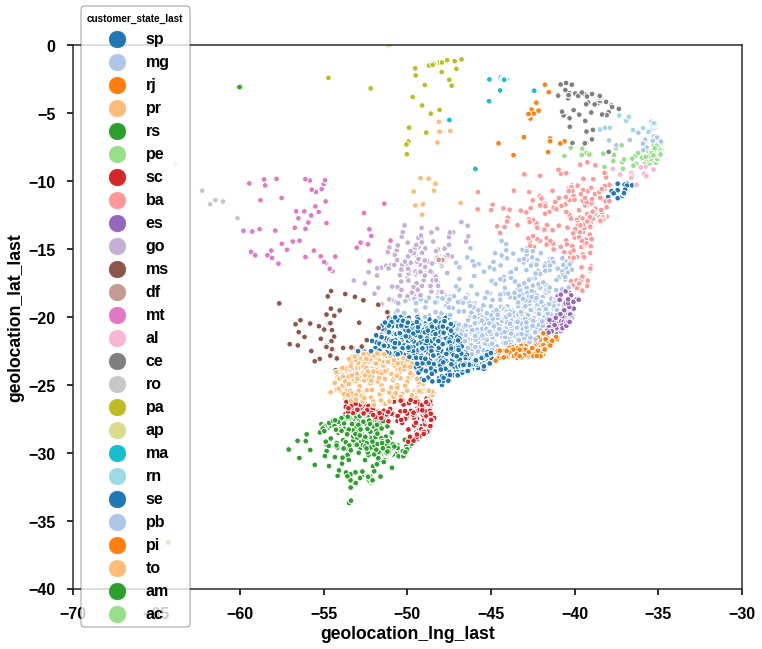

In [77]:
plt.style.use('seaborn-poster') 
plt.rcParams["figure.figsize"] = [12,10]
ax = sns.scatterplot(data=dfTOTAL3_MAP, x='geolocation_lng_last', y='geolocation_lat_last', 
                hue='customer_state_last', sizes=1, marker='.', palette="tab20") #, alpha=0.8)
ax.set_xlim(left=-70, right=-30)
ax.set_ylim(-40, 0)
plt.savefig(direc0 + '26-MAP-State.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

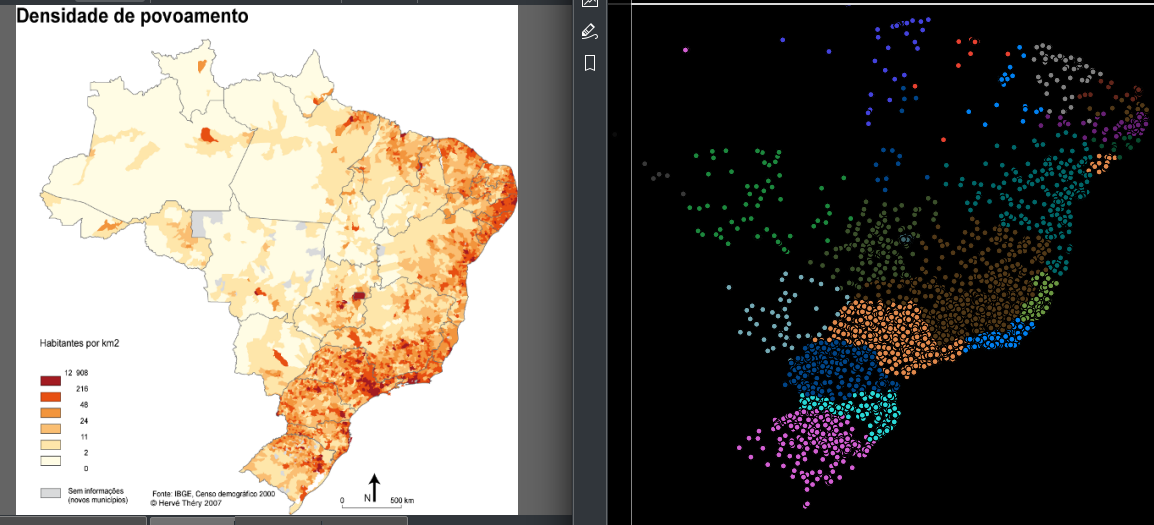

#### 1D - Distribution

freight_value
freight_value_sum
geolocation_lat_last
geolocation_lng_last
item_number
population
price_and_freight_sum
price_mean
price_sum


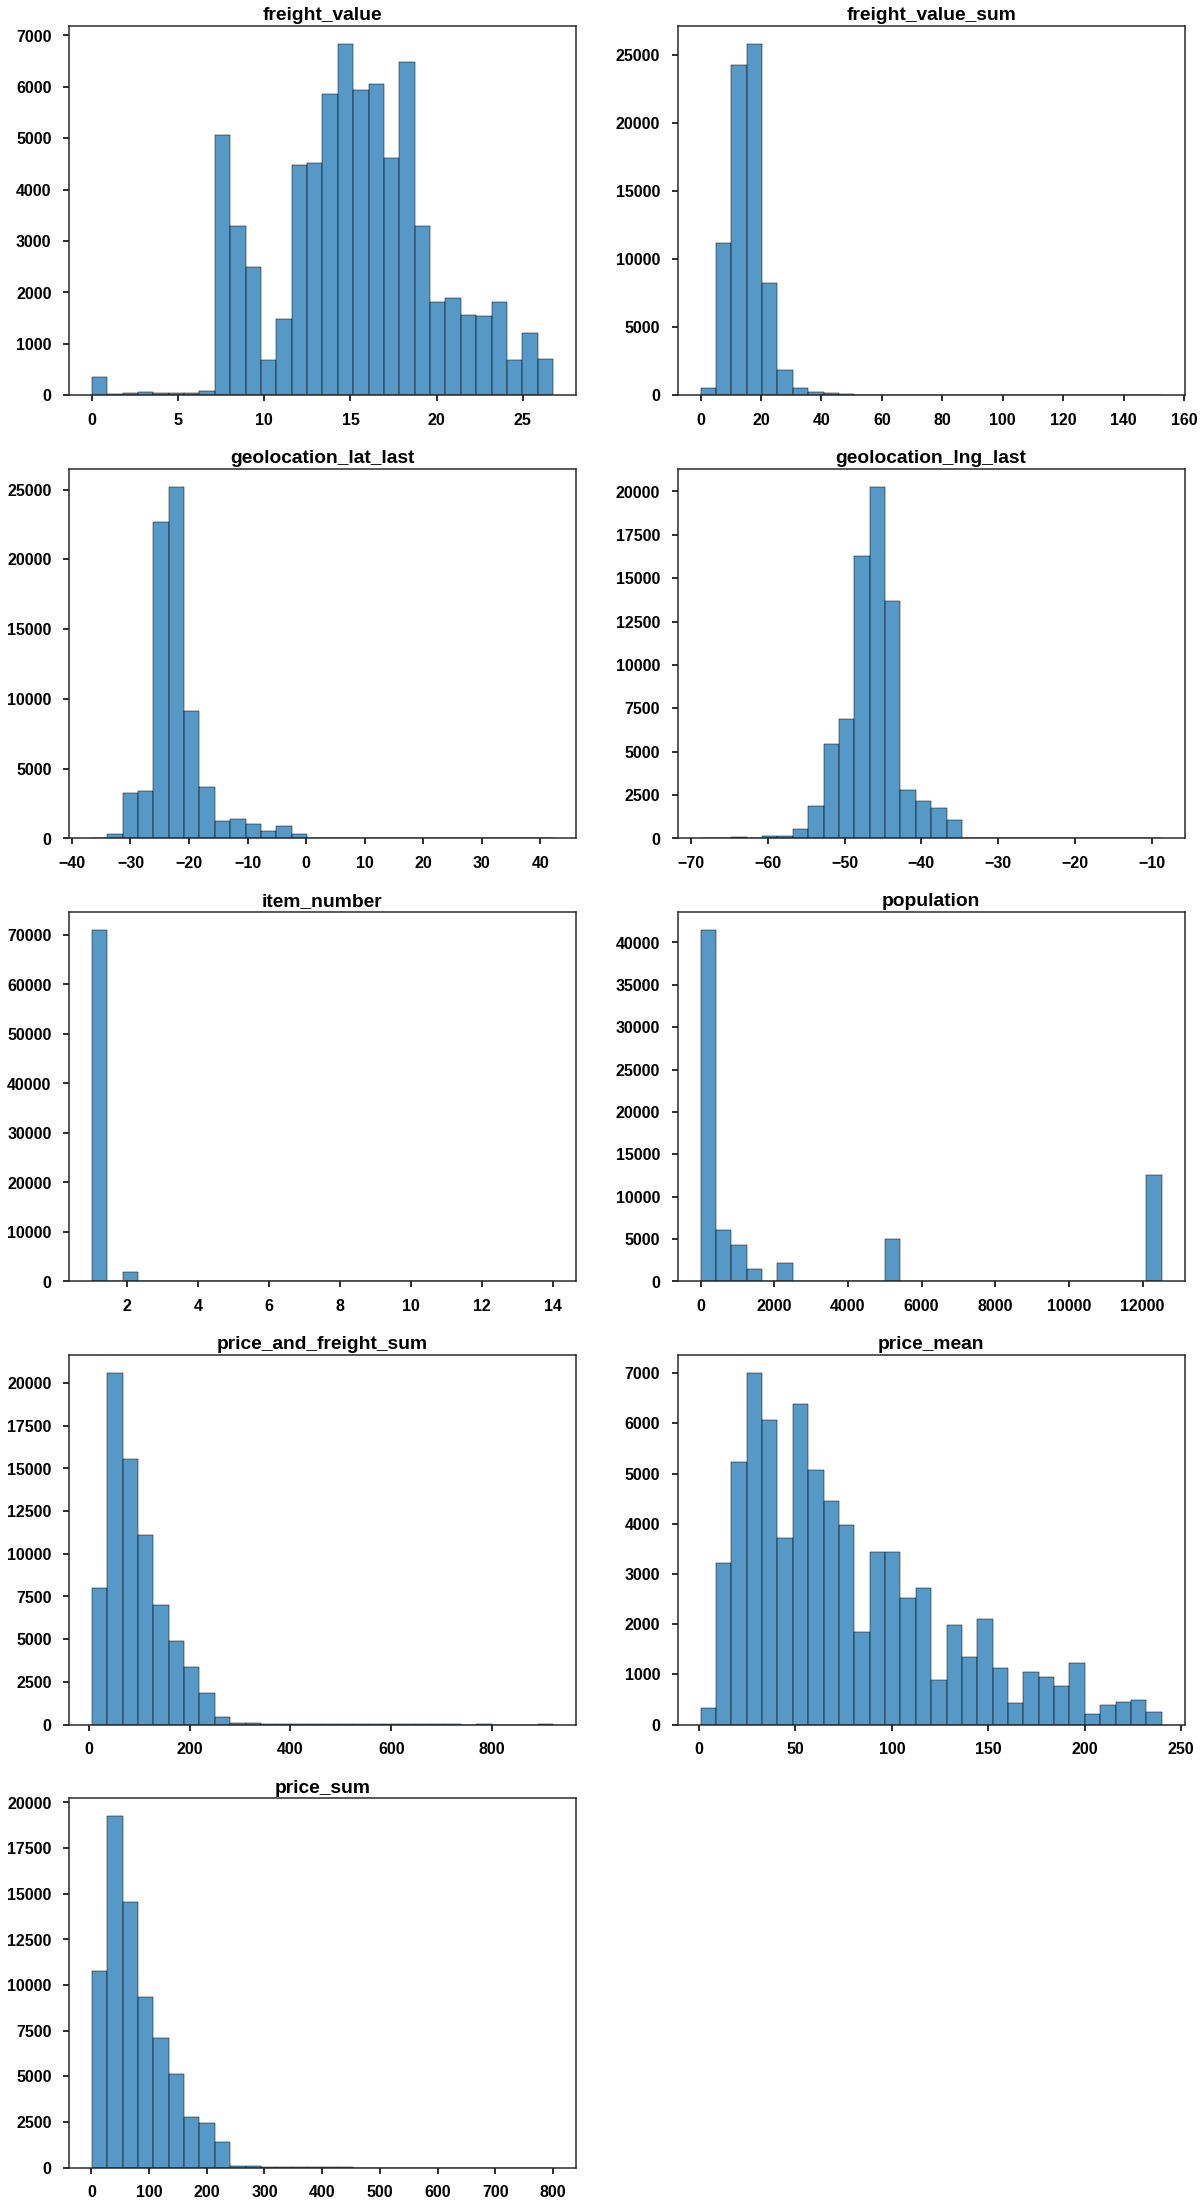

In [78]:
plt.style.use('seaborn-poster') 

nc = 2
nf = 9

fig = plt.figure(figsize=(10*nc, 8*nf))
plt.subplots_adjust(wspace=0.2, hspace=0.2) #interspace entre graphiques

cc = -1
for cc, c in enumerate(lVAR_num_cont):
    
    print(c)
    ax = fig.add_subplot(nf, nc, (cc+1))
    ax = sns.histplot(data=dfTOTAL3[c],ax = ax,  common_norm=True, bins=30) #, common_norm=True,kde=True
    ax.set_title(c)
    ax.set_ylabel('')
    ax.set_xlabel('')
    #ax.set_xscale('symlog', linthresh=10000000)
plt.show()
fig.savefig(direc0 + '26-1D-Distribution-num_cont.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

order_purchase_timestamp_last
population_st
product_description_lenght_cat_mean
product_name_lenght_cat_mean
product_photos_qty_cat
review_score_mean


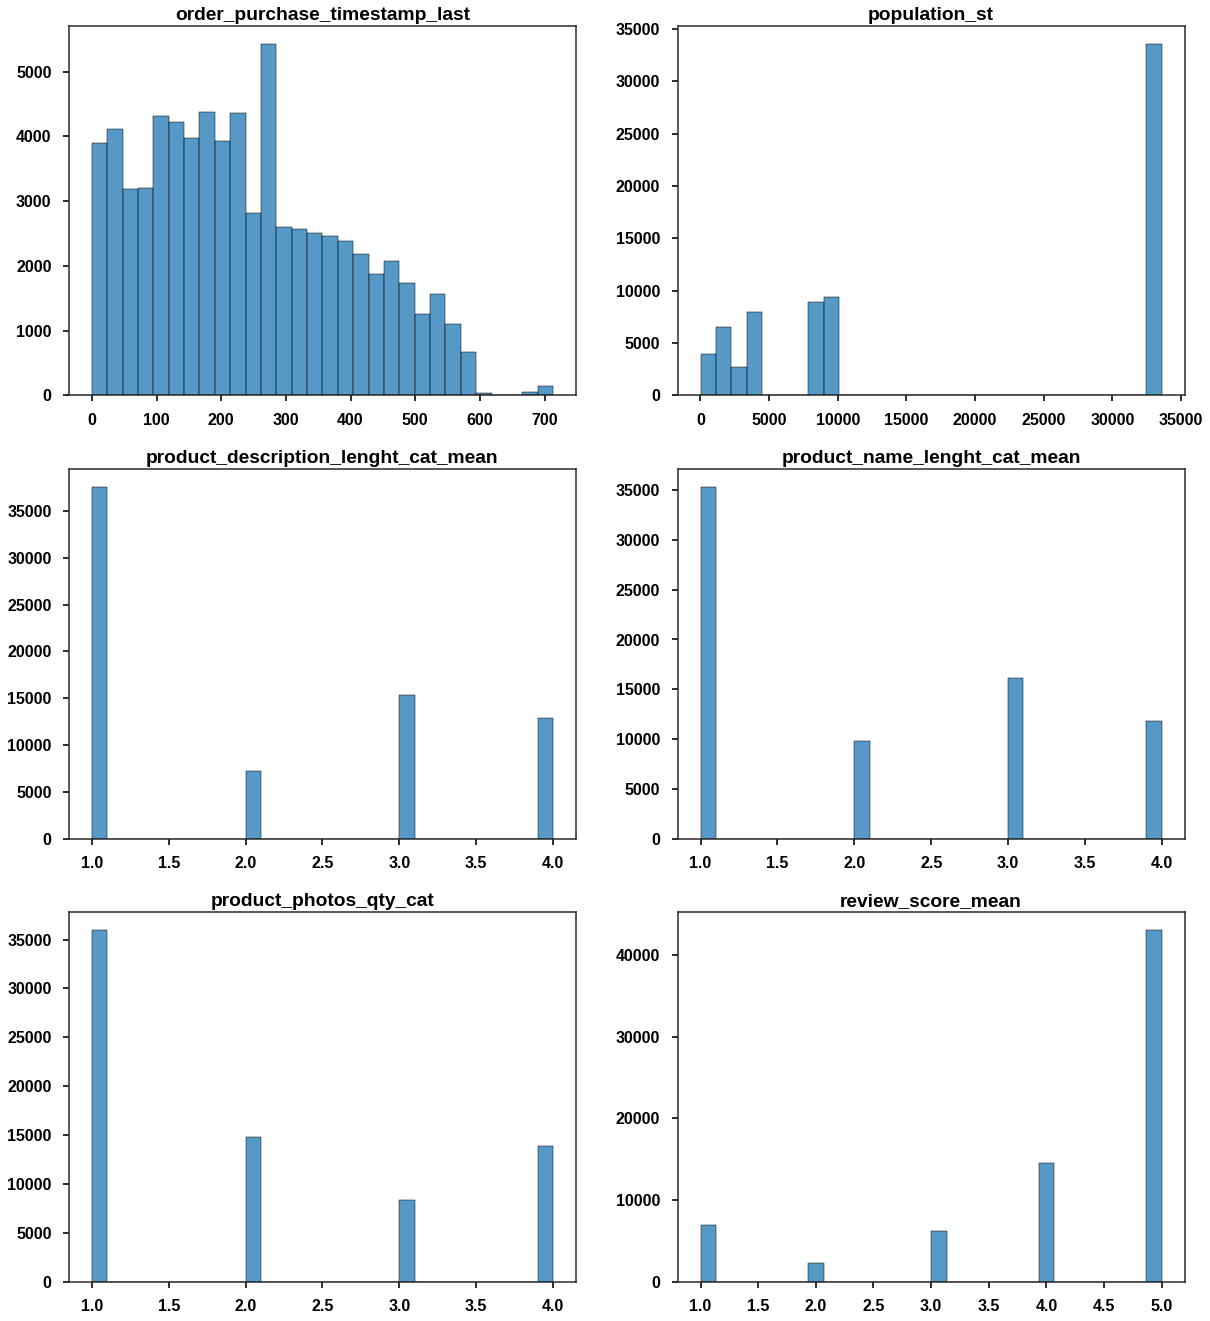

In [79]:
plt.style.use('seaborn-poster') 

nc = 2
nf = 9

fig = plt.figure(figsize=(10*nc, 8*nf))
plt.subplots_adjust(wspace=0.2, hspace=0.2) #interspace entre graphiques

cc = -1
for cc, c in enumerate(lVAR_num_cat):
    
    print(c)
    ax = fig.add_subplot(nf, nc, (cc+1))
    ax = sns.histplot(data=dfTOTAL3[c],ax = ax,  common_norm=True, bins=30) #, common_norm=True,kde=True
    ax.set_title(c)
    ax.set_ylabel('')
    ax.set_xlabel('')

plt.show()
fig.savefig(direc0 + '26-1D-Distribution-num_cont.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

### Lorenz Curves

In [80]:
lVAR_cible, lVAR_str, lVAR_num, lVAR_cat, lVAR_cont, lVAR_str_cat, lVAR_str_cont, lVAR_num_cat, lVAR_num_cont = lVAR_classification(dfTOTAL3[dfTOTAL3.columns.difference(['product_category_name'])])

lVAR_cible []
.......
lVAR_str_cat  Index(['order_purchase_timestamp_W_cat', 'order_purchase_timestamp_M_cat',
       'o_purchase_time_H_cat', 'customer_state_last'],
      dtype='object')
lVAR_str_cont  Index(['customer_city_last'], dtype='object')
.......
lVAR_num_cat  Index(['order_purchase_timestamp_last', 'population_st',
       'product_description_lenght_cat_mean', 'product_name_lenght_cat_mean',
       'product_photos_qty_cat', 'review_score_mean'],
      dtype='object')
lVAR_num_cont  Index(['freight_value', 'freight_value_sum', 'geolocation_lat_last',
       'geolocation_lng_last', 'item_number', 'population',
       'price_and_freight_sum', 'price_mean', 'price_sum'],
      dtype='object')
.......
lVAR_cat  ['order_purchase_timestamp_W_cat' 'order_purchase_timestamp_M_cat'
 'o_purchase_time_H_cat' 'customer_state_last'
 'order_purchase_timestamp_last' 'population_st'
 'product_description_lenght_cat_mean' 'product_name_lenght_cat_mean'
 'product_photos_qty_cat' 'review_score

In [81]:
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

freight_value
freight_value_sum
item_number
population
price_and_freight_sum
price_mean
price_sum


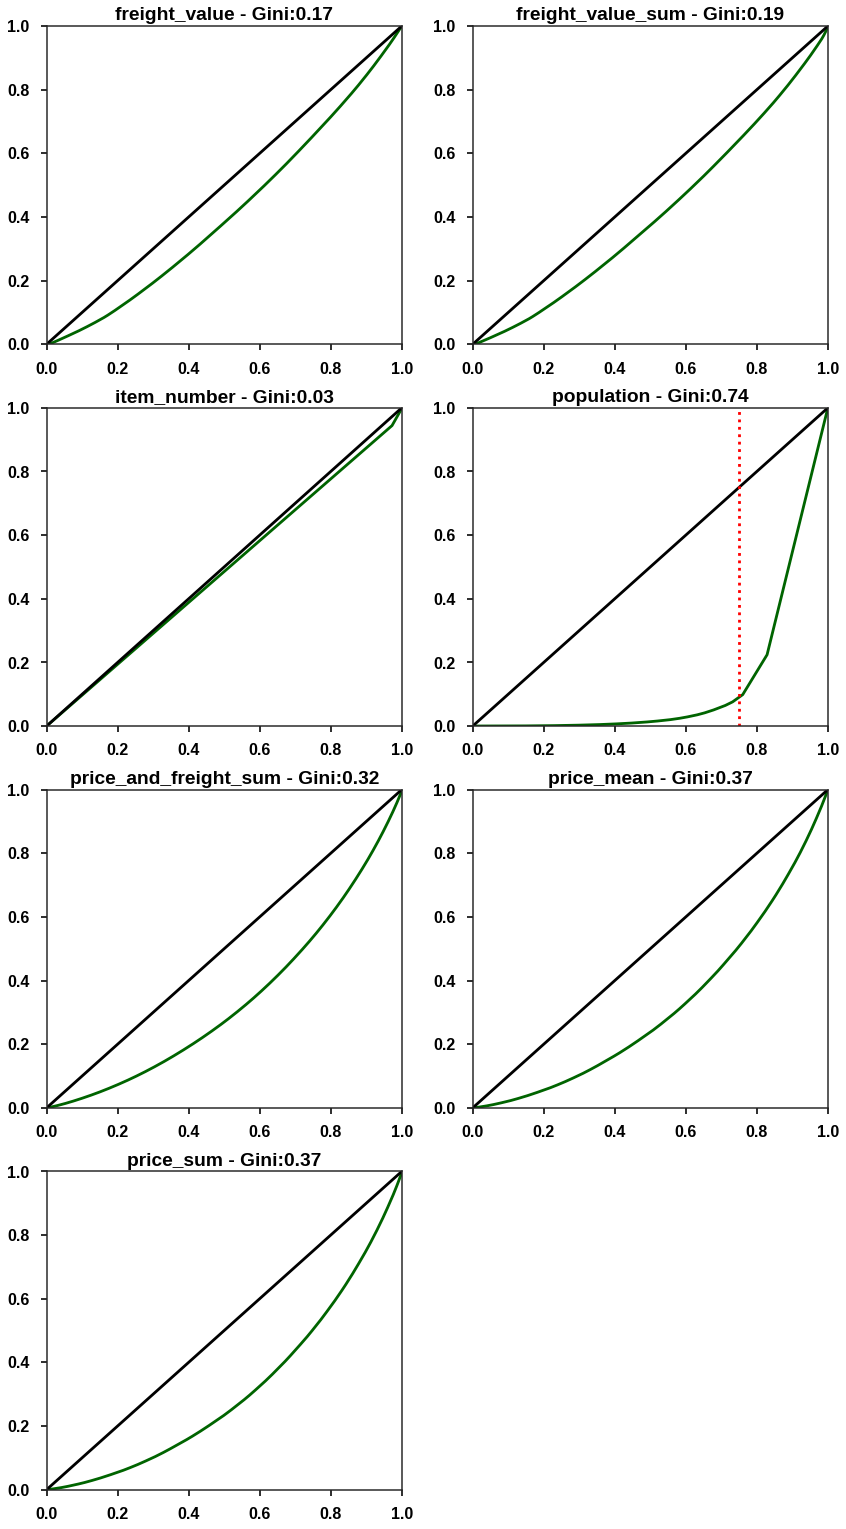

In [82]:
nc = 2
nf = 50

fig = plt.figure(figsize=(7*nc, 7*nf))
plt.subplots_adjust(wspace=0.2, hspace=0.2) #interspace entre graphiques

for cc, icd in enumerate(lVARS):
    print(icd)
    X = np.array(dfTOTAL3.sort_values(icd)[icd])
    
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0) 
    x = np.arange(X_lorenz.size)/(X_lorenz.size-1)
    
    ax = fig.add_subplot(nf, nc, (cc+1))
    ## scatter plot of Lorenz curve
    ax.plot(x, X_lorenz, color='darkgreen')#, marker='.', color='darkgreen', s=100)
    ## line plot of equality
    ax.plot([0,1], [0,1], color='k')
    if icd == 'population' : ax.plot([0.75,0.75], [0, 1], "r:")
    
    g = str(np.round_(gini(X), decimals=2))
    
    ax.set_title(icd+' - Gini:'+g)
    #ax.set_ylabel('')
    ax.set_xlabel('')

    ax.set_xlim(left=0, right=1)
    ax.set_ylim(0, 1)


plt.show()
fig.savefig(direc0 + '26-Price-Cat.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')



In [83]:
for var in lVARS:
    Lor = dfTOTAL3.sort_values(var)
    dfTOTAL3['lorenz_DELETE'] = Lor[var].cumsum() / Lor[var].sum()
    var_cat = var+'_cat'
    dfTOTAL3[var_cat] = '1'
    dfTOTAL3[var_cat][dfTOTAL3['lorenz_DELETE'] >0.33] = '2'
    dfTOTAL3[var_cat][dfTOTAL3['lorenz_DELETE'] >0.66] = '3'
    dfTOTAL3 = dfTOTAL3.drop(['lorenz_DELETE'], axis=1)
dfTOTAL3

/tmp/ipykernel_24176/2507069243.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTOTAL3[var_cat][dfTOTAL3['lorenz_DELETE'] >0.33] = '2'
/tmp/ipykernel_24176/2507069243.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTOTAL3[var_cat][dfTOTAL3['lorenz_DELETE'] >0.66] = '3'


,customer_city_last,customer_state_last,order_purchase_timestamp_last,estimated_delivered_time_mean,review_score_mean,price_mean,price_sum,item_number,freight_value,freight_value_sum,product_category_name,product_name_lenght_cat_mean,product_description_lenght_cat_mean,geolocation_lat_last,geolocation_lng_last,product_photos_qty_cat,order_purchase_timestamp_M_cat,order_purchase_timestamp_W_cat,o_purchase_time_H_cat,price_and_freight_sum,population,population_st,freight_value_cat,freight_value_sum_cat,item_number_cat,population_cat,price_and_freight_sum_cat,price_mean_cat,price_sum_cat
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,cajamar,sp,111,10,5,129.9,129.9,1,12.0,12.0,{bed_bath_table},4,1,-23.335331,-46.828647,1,Jun-Aug,Week,7-12,141.9,81,33599,1,1,1,1,2,2,2
0000b849f77a49e4a4ce2b2a4ca5be3f,osasco,sp,114,7,4,18.9,18.9,1,8.29,8.29,{health_beauty},3,2,-23.567395,-46.792957,1,Jun-Aug,Week,7-12,27.19,619,33599,1,1,2,1,1,1,1
0000f46a3911fa3c0805444483337064,sao jose,sc,536,27,3,69.0,69.0,1,17.22,17.22,{stationery},1,1,-27.543787,-48.62568,3,Feb-May,Week,18-23,86.22,130,2724,2,2,2,1,1,1,1
0000f6ccb0745a6a4b88665a16c9f078,belem,pa,320,31,4,25.99,25.99,1,17.63,17.63,{telephony},1,4,-1.311011,-48.482884,4,Nov-Jan,Week,18-23,43.62,214,379,2,2,2,1,1,1,1
0004aac84e0df4da2b147fca70cf8255,sorocaba,sp,287,20,5,180.0,180.0,1,16.89,16.89,{telephony},3,3,-23.504368,-47.466156,3,Nov-Jan,Week,18-23,196.89,509,33599,2,2,2,1,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffb09418989a0dbff854a28163e47c6,veranopolis,rs,254,31,5,58.0,58.0,1,15.16,15.16,{watches_gifts},1,3,-28.935745,-51.552048,1,Nov-Jan,Weekend,18-23,73.16,13,4065,2,2,1,1,1,1,1
fffea47cd6d3cc0a88bd621562a9d061,feira de santana,ba,261,32,4,64.89,64.89,1,19.69,19.69,{baby},1,1,-12.221792,-38.962517,2,Nov-Jan,Weekend,18-23,84.58,122,2150,3,3,1,1,1,1,1
ffff371b4d645b6ecea244b27531430a,sinop,mt,568,44,5,89.9,89.9,1,22.56,22.56,{auto},3,3,-11.829317,-55.496443,4,Feb-May,Week,14-18,112.46,28,531,3,3,1,1,2,2,2


In [84]:
var = 'population'
Lor = dfTOTAL3.sort_values(var)
dfTOTAL3['lorenz_DELETE'] = Lor[var].cumsum() / Lor[var].sum()
var_cat = var+'_cat'
dfTOTAL3[var_cat] = 'Rural'
dfTOTAL3[var_cat][dfTOTAL3['lorenz_DELETE'] >0.75] = 'City'
dfTOTAL3 = dfTOTAL3.drop(['lorenz_DELETE'], axis=1)
dfTOTAL3

/tmp/ipykernel_24176/3219836994.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTOTAL3[var_cat][dfTOTAL3['lorenz_DELETE'] >0.75] = 'City'


,customer_city_last,customer_state_last,order_purchase_timestamp_last,estimated_delivered_time_mean,review_score_mean,price_mean,price_sum,item_number,freight_value,freight_value_sum,product_category_name,product_name_lenght_cat_mean,product_description_lenght_cat_mean,geolocation_lat_last,geolocation_lng_last,product_photos_qty_cat,order_purchase_timestamp_M_cat,order_purchase_timestamp_W_cat,o_purchase_time_H_cat,price_and_freight_sum,population,population_st,freight_value_cat,freight_value_sum_cat,item_number_cat,population_cat,price_and_freight_sum_cat,price_mean_cat,price_sum_cat
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,cajamar,sp,111,10,5,129.9,129.9,1,12.0,12.0,{bed_bath_table},4,1,-23.335331,-46.828647,1,Jun-Aug,Week,7-12,141.9,81,33599,1,1,1,Rural,2,2,2
0000b849f77a49e4a4ce2b2a4ca5be3f,osasco,sp,114,7,4,18.9,18.9,1,8.29,8.29,{health_beauty},3,2,-23.567395,-46.792957,1,Jun-Aug,Week,7-12,27.19,619,33599,1,1,2,Rural,1,1,1
0000f46a3911fa3c0805444483337064,sao jose,sc,536,27,3,69.0,69.0,1,17.22,17.22,{stationery},1,1,-27.543787,-48.62568,3,Feb-May,Week,18-23,86.22,130,2724,2,2,2,Rural,1,1,1
0000f6ccb0745a6a4b88665a16c9f078,belem,pa,320,31,4,25.99,25.99,1,17.63,17.63,{telephony},1,4,-1.311011,-48.482884,4,Nov-Jan,Week,18-23,43.62,214,379,2,2,2,Rural,1,1,1
0004aac84e0df4da2b147fca70cf8255,sorocaba,sp,287,20,5,180.0,180.0,1,16.89,16.89,{telephony},3,3,-23.504368,-47.466156,3,Nov-Jan,Week,18-23,196.89,509,33599,2,2,2,Rural,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffb09418989a0dbff854a28163e47c6,veranopolis,rs,254,31,5,58.0,58.0,1,15.16,15.16,{watches_gifts},1,3,-28.935745,-51.552048,1,Nov-Jan,Weekend,18-23,73.16,13,4065,2,2,1,Rural,1,1,1
fffea47cd6d3cc0a88bd621562a9d061,feira de santana,ba,261,32,4,64.89,64.89,1,19.69,19.69,{baby},1,1,-12.221792,-38.962517,2,Nov-Jan,Weekend,18-23,84.58,122,2150,3,3,1,Rural,1,1,1
ffff371b4d645b6ecea244b27531430a,sinop,mt,568,44,5,89.9,89.9,1,22.56,22.56,{auto},3,3,-11.829317,-55.496443,4,Feb-May,Week,14-18,112.46,28,531,3,3,1,Rural,2,2,2


### Z-score

In [85]:
from scipy import stats
dfTOTAL3['price_sum_z-score'] = stats.zscore(np.array(dfTOTAL3['price_sum']).astype('float64') ) #price_and_freight_sum

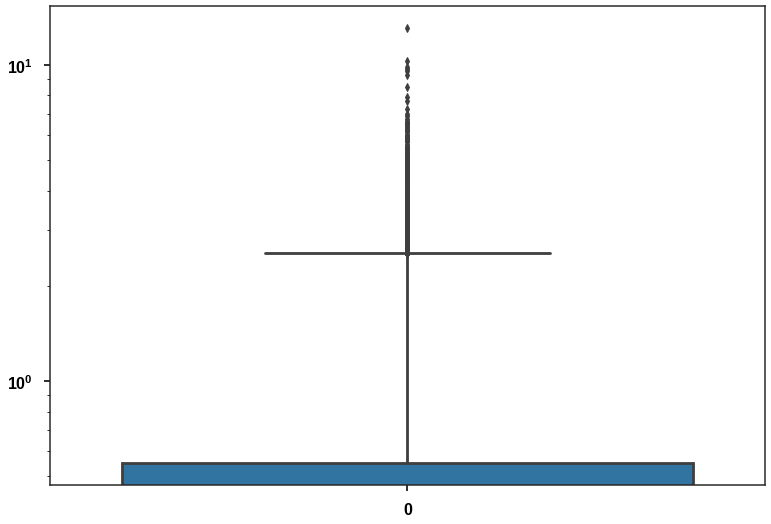

In [86]:
fig = plt.figure()
ax = sns.boxplot(data=dfTOTAL3['price_sum_z-score'], showfliers=True, showmeans = True)
ax.set_yscale('log')
plt.show()
fig.savefig(direc0 + '2-BoxPlot-price_sum_z-score.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

In [87]:
var = 'price_sum_z-score'
var_cat = var+'_cat'
dfTOTAL3[var_cat] = 'Normal'

quartil = np.array(dfTOTAL3[var].quantile([0.9]))[0]
lindex = dfTOTAL3[var][dfTOTAL3[var]>=quartil].index
dfTOTAL3.loc[lindex, var_cat] = 'Premium'

dfTOTAL3

,customer_city_last,customer_state_last,order_purchase_timestamp_last,estimated_delivered_time_mean,review_score_mean,price_mean,price_sum,item_number,freight_value,freight_value_sum,product_category_name,product_name_lenght_cat_mean,product_description_lenght_cat_mean,geolocation_lat_last,geolocation_lng_last,product_photos_qty_cat,order_purchase_timestamp_M_cat,order_purchase_timestamp_W_cat,o_purchase_time_H_cat,price_and_freight_sum,population,population_st,freight_value_cat,freight_value_sum_cat,item_number_cat,population_cat,price_and_freight_sum_cat,price_mean_cat,price_sum_cat,price_sum_z-score,price_sum_z-score_cat
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,cajamar,sp,111,10,5,129.9,129.9,1,12.0,12.0,{bed_bath_table},4,1,-23.335331,-46.828647,1,Jun-Aug,Week,7-12,141.9,81,33599,1,1,1,Rural,2,2,2,0.913424,Normal
0000b849f77a49e4a4ce2b2a4ca5be3f,osasco,sp,114,7,4,18.9,18.9,1,8.29,8.29,{health_beauty},3,2,-23.567395,-46.792957,1,Jun-Aug,Week,7-12,27.19,619,33599,1,1,2,Rural,1,1,1,-1.101578,Normal
0000f46a3911fa3c0805444483337064,sao jose,sc,536,27,3,69.0,69.0,1,17.22,17.22,{stationery},1,1,-27.543787,-48.62568,3,Feb-May,Week,18-23,86.22,130,2724,2,2,2,Rural,1,1,1,-0.192104,Normal
0000f6ccb0745a6a4b88665a16c9f078,belem,pa,320,31,4,25.99,25.99,1,17.63,17.63,{telephony},1,4,-1.311011,-48.482884,4,Nov-Jan,Week,18-23,43.62,214,379,2,2,2,Rural,1,1,1,-0.972872,Normal
0004aac84e0df4da2b147fca70cf8255,sorocaba,sp,287,20,5,180.0,180.0,1,16.89,16.89,{telephony},3,3,-23.504368,-47.466156,3,Nov-Jan,Week,18-23,196.89,509,33599,2,2,2,Rural,3,3,3,1.822897,Premium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffb09418989a0dbff854a28163e47c6,veranopolis,rs,254,31,5,58.0,58.0,1,15.16,15.16,{watches_gifts},1,3,-28.935745,-51.552048,1,Nov-Jan,Weekend,18-23,73.16,13,4065,2,2,1,Rural,1,1,1,-0.391789,Normal
fffea47cd6d3cc0a88bd621562a9d061,feira de santana,ba,261,32,4,64.89,64.89,1,19.69,19.69,{baby},1,1,-12.221792,-38.962517,2,Nov-Jan,Weekend,18-23,84.58,122,2150,3,3,1,Rural,1,1,1,-0.266714,Normal
ffff371b4d645b6ecea244b27531430a,sinop,mt,568,44,5,89.9,89.9,1,22.56,22.56,{auto},3,3,-11.829317,-55.496443,4,Feb-May,Week,14-18,112.46,28,531,3,3,1,Rural,2,2,2,0.187297,Normal


### Combined graphs

#### 2D - Distribution

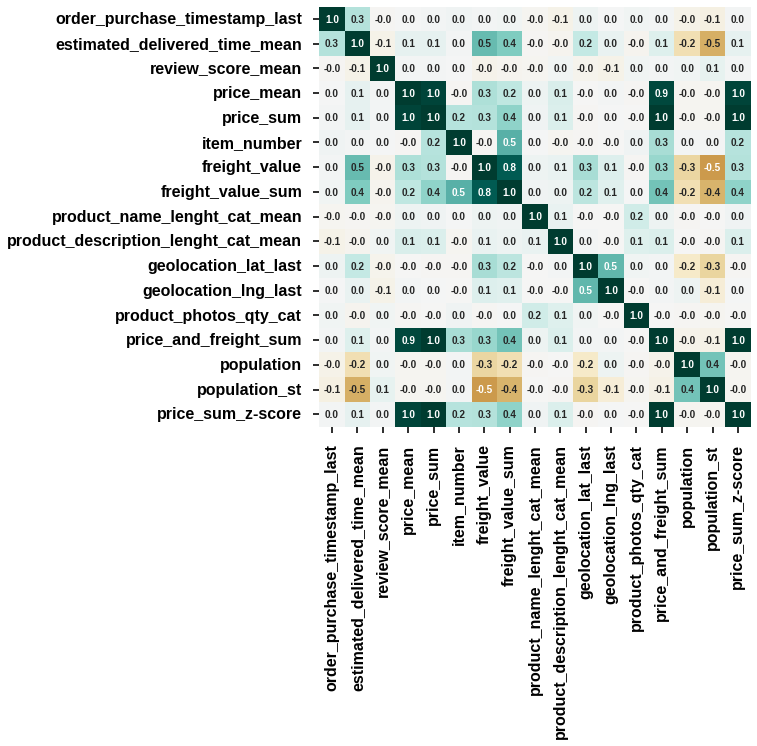

In [88]:
plt.style.use('seaborn-poster') 
dfDATA_corr = dfTOTAL3.corr()

plt.rcParams["figure.figsize"] = [len(dfDATA_corr.columns)/2.2,len(dfDATA_corr.columns)/2.2]
heatmap = sns.heatmap(dfDATA_corr, vmin=-1, vmax=1, annot=True, fmt='.1f', cmap='BrBG', cbar=False) #, mask=mask)
plt.savefig(direc0 + '26-dfTOTAL_corr.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')
#plt.rcParams["figure.figsize"] = [6, 5]

##### 2D - Distribution (ZOOM)

In [89]:
dfDATA_corr_ZOOM = dfDATA_corr
for c in dfDATA_corr.columns:
    if sum(dfDATA_corr_ZOOM[c]>=0.35)==1:
        dfDATA_corr_ZOOM = dfDATA_corr_ZOOM.drop(c, axis=0)
        dfDATA_corr_ZOOM = dfDATA_corr_ZOOM.drop(c, axis=1)

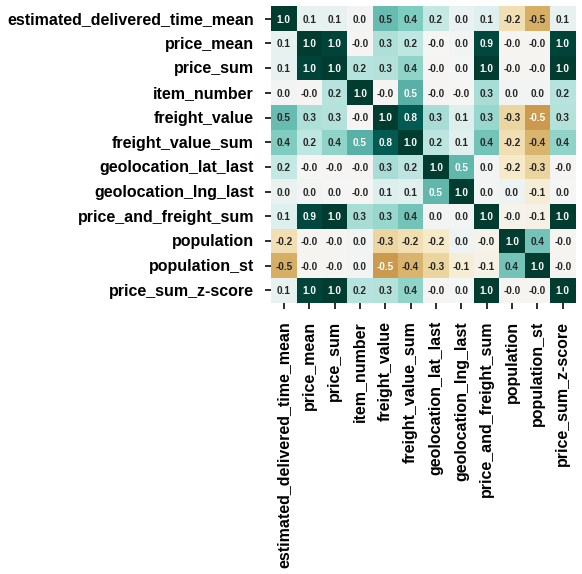

In [90]:
plt.rcParams["figure.figsize"] = [len(dfDATA_corr_ZOOM.columns)/2.2,len(dfDATA_corr_ZOOM.columns)/2.2]

# define the mask to set the values in the upper triangle to True
heatmap = sns.heatmap(dfDATA_corr_ZOOM, vmin=-1, vmax=1, annot=True, fmt='.1f', cmap='BrBG', cbar=False) #, mask=mask)
plt.savefig(direc0 + '26-dfDATA2_corr_ZOOM.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')
plt.rcParams["figure.figsize"] = [6, 5]

In [91]:
dfDATA_corr_ZOOM.columns

Index(['estimated_delivered_time_mean', 'price_mean', 'price_sum',
       'item_number', 'freight_value', 'freight_value_sum',
       'geolocation_lat_last', 'geolocation_lng_last', 'price_and_freight_sum',
       'population', 'population_st', 'price_sum_z-score'],
      dtype='object')

**r2:**
   
**-'price_mean', 'price_sum', 'price_and_freight_sum'**
   
**-'freight_value', 'freight_value_sum'**

### Correlation ANOVA

In [92]:
lVAR_cible, lVAR_str, lVAR_num, lVAR_cat, lVAR_cont, lVAR_str_cat, lVAR_str_cont, lVAR_num_cat, lVAR_num_cont = lVAR_classification(dfTOTAL3[dfTOTAL3.columns.difference(['product_category_name'])])

lVAR_cible []
.......
lVAR_str_cat  Index(['order_purchase_timestamp_W_cat', 'population_cat',
       'price_sum_z-score_cat', 'freight_value_cat', 'freight_value_sum_cat',
       'item_number_cat', 'price_and_freight_sum_cat', 'price_mean_cat',
       'price_sum_cat', 'order_purchase_timestamp_M_cat',
       'o_purchase_time_H_cat', 'customer_state_last'],
      dtype='object')
lVAR_str_cont  Index(['customer_city_last'], dtype='object')
.......
lVAR_num_cat  Index(['order_purchase_timestamp_last', 'population_st',
       'product_description_lenght_cat_mean', 'product_name_lenght_cat_mean',
       'product_photos_qty_cat', 'review_score_mean'],
      dtype='object')
lVAR_num_cont  Index(['freight_value', 'freight_value_sum', 'geolocation_lat_last',
       'geolocation_lng_last', 'item_number', 'population',
       'price_and_freight_sum', 'price_mean', 'price_sum',
       'price_sum_z-score'],
      dtype='object')
.......
lVAR_cat  ['order_purchase_timestamp_W_cat' 'population_cat' 

In [93]:
dfTOTAL_cor = dfTOTAL3.sample(5000).convert_dtypes().copy()
dfTOTAL_cor[lVAR_num_cont] = dfTOTAL_cor[lVAR_num_cont].astype('Float64') 
dfTOTAL_cor.dtypes

customer_city_last                      string
customer_state_last                     string
order_purchase_timestamp_last            Int64
estimated_delivered_time_mean            Int64
review_score_mean                        Int64
price_mean                             Float64
price_sum                              Float64
item_number                            Float64
freight_value                          Float64
freight_value_sum                      Float64
product_category_name                   object
product_name_lenght_cat_mean             Int64
product_description_lenght_cat_mean      Int64
geolocation_lat_last                   Float64
geolocation_lng_last                   Float64
product_photos_qty_cat                   Int64
order_purchase_timestamp_M_cat          string
order_purchase_timestamp_W_cat          string
o_purchase_time_H_cat                   string
price_and_freight_sum                  Float64
population                             Float64
population_st

####  Shapiro–Wilk's test of normality
L’hypothèse nulle : La population est normalement distribuée.

Si pval < α choisi, alors l’hypothèse nulle est rejetée et il est prouvé que les données testées ne sont pas normalement distribuées.

Dans notre cas, **la probabilité que les variables soint normalement distribuées est de 0.00%**. pval < α (5%).
 


        'W': Test statistic.

        'pval': p-value.

        'normal': True if data is normally distributed.

In [94]:
pg.normality(dfTOTAL_cor[lVARS], alpha=0.05).style.format('{0:,.2f}', subset=['pval', 'W'])

,W,pval,normal
freight_value,0.98,0.00,False
freight_value_sum,0.84,0.00,False
item_number,0.10,0.00,False
population,0.60,0.00,False
price_and_freight_sum,0.90,0.00,False
price_mean,0.92,0.00,False
price_sum,0.90,0.00,False


**0.00% de probabilité que les variables soint normalement distribuées**

#### Visualisation de la normalité

freight_value
freight_value_sum
item_number
population
price_and_freight_sum
price_mean
price_sum


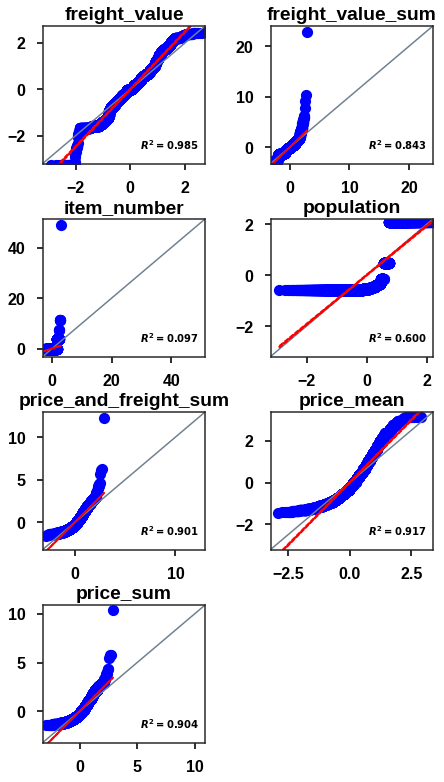

In [95]:
mean, std = 0, 0.8

nc = 2
nf = 20

fig = plt.figure(figsize=(7*nc/2, 7*nf/2))
plt.subplots_adjust(wspace=0.4, hspace=0.4) #interspace entre graphiques

for cc, c in enumerate(lVARS):
    print(c)
    ax = fig.add_subplot(nf, nc, (cc+1))
    ax = pg.qqplot(dfTOTAL_cor[c].tolist(), dist='norm', sparams=(mean, std), ax=ax)
    ax.set_title(c)
    ax.set_ylabel('')
    ax.set_xlabel('')
    #ax.set_xscale('symlog', linthresh=10000000)
plt.show()
fig.savefig(direc0 + '26-Distribution-NormaliteQQ.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

#### Box-Cox

freight_value
freight_value_sum
item_number
population
price_and_freight_sum
price_mean
price_sum


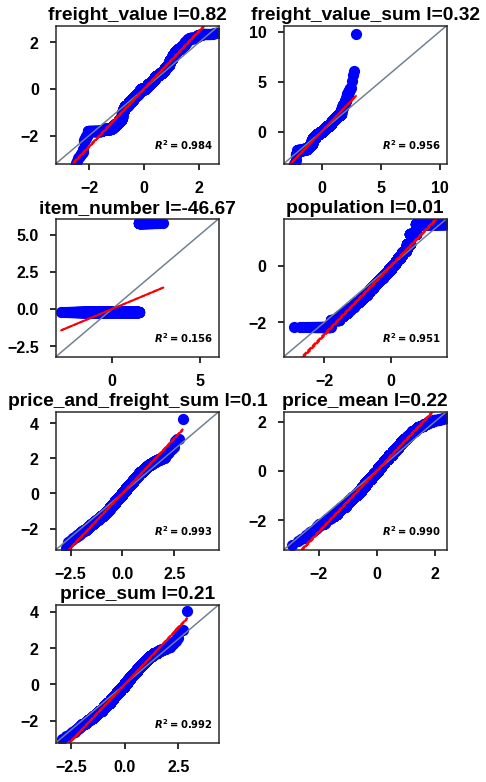

,W,pval,normal
freight_value,0.98,0.00,False
freight_value_sum,0.96,0.00,False
item_number,0.16,0.00,False
population,0.95,0.00,False
price_and_freight_sum,0.99,0.00,False
price_mean,0.99,0.00,False
price_sum,0.99,0.00,False


In [96]:
fig = plt.figure(figsize=(7*nc/2, 7*nf/2))
plt.subplots_adjust(wspace=0.4, hspace=0.4) #interspace entre graphiques

BoxCox = pd.DataFrame([])

cc = -1
for c in lVARS:
    cc = cc + 1

    print(c)
    DATA_boxcox = scipy.stats.boxcox(dfTOTAL_cor[c][(dfTOTAL_cor[c] > 0)].tolist())
    ax = fig.add_subplot(nf, nc, (cc+1))
    ax = pg.qqplot(DATA_boxcox[0], dist='norm', sparams=(mean, std), ax=ax)
    
    DATA_boxcox, lamda = scipy.stats.boxcox(dfTOTAL_cor[c][(dfTOTAL_cor[c] > 0)].tolist())
    ax.set_title(c + ' l=' +str(lamda.round(2)))
    ax.set_ylabel('')
    ax.set_xlabel('')
    #ax.set_xscale('symlog', linthresh=10000000)

    B = pd.DataFrame(DATA_boxcox,columns=[c])
    BoxCox = pd.concat([BoxCox,B], axis=1)
    
plt.show()
fig.savefig(direc0 + '26-Distribution-NormaliteQQ-KB.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

pg.normality(BoxCox, alpha=0.05).style.format('{0:,.2f}', subset=['pval', 'W'])

####  Shapiro–Wilk's test of normality
L’hypothèse nulle : La population est normalement distribuée.

Si pval < α choisi, alors l’hypothèse nulle est rejetée et il est prouvé que les données testées ne sont pas normalement distribuées.

Dans notre cas, **la probabilité que les variables soint normalement distribuées est de 0.00%**. pval < α (5%).
 


        'W': Test statistic.

        'pval': p-value.

        'normal': True if data is normally distributed.

**0.00% de probabilité que les variables soint normalement distribuées**

#### Kruskal-Wallis test
L’hypothèse nulle : La médiane de population de tous les groupes est
égale (version non paramétrique de l’ANOVA).

Dans notre cas, la probabilité que les variables soint independants est
de 0.00% -> (la probabilité que les variables soint dependants est de
100%) -> Correlation.


In [97]:
kruskal = pd.DataFrame([], index = lVAR_str_cat)

for ik in lVAR_cat:
    for c in lVARS:

        k = pg.kruskal(dv=c, between=ik, data=dfTOTAL_cor, detailed=True)
        k = k.set_index('Source')

        #kruskal.loc[ik,c] = k.loc[[ik],['p-unc']].values
        kruskal.loc[ik,c] = k.loc[[ik], ['p-unc']].to_numpy()[0]

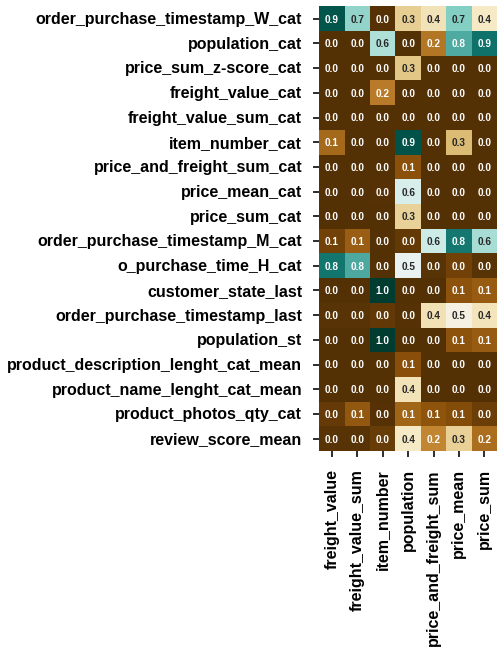

In [98]:
plt.rcParams["figure.figsize"] = [len(lVARS)/2.2,len(lVAR_cat)/2.2]
heatmap = sns.heatmap(kruskal,  annot=True, fmt='.1f', cmap='BrBG', cbar=False) #, mask=mask)
plt.savefig(direc0 + '26-kruskal.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')
plt.style.use('seaborn-poster') 

**Correlation entre les variables NUM et les
variables CAT**

**Les seules exceptions sont :**

**Entre 'review_score_mean', 'o_purchase_time_H_cat', W, M et 'price_mean'**

**Entre 'order_purchase_timestamp_W_cat' et 'freight_value'**

#### ANOVA hipothese 2 : https://pingouin-stats.org/generated/pingouin.homoscedasticity.html 

##### p-unc (independant)

In [99]:
pUNC = pd.DataFrame([], index = lVAR_str_cat)
np2 = pd.DataFrame([], index = lVAR_str_cat)
#lVAR_str_cat = lVAR_str_cat.tolist()

for n in  lVARS:
    for c in  lVAR_str_cat:
        aov = pg.anova(dv=n, between=c, data=dfTOTAL_cor, detailed=True)
        aov = aov.set_index('Source')
        
        pUNC.loc[[c], [n]] = aov.loc[[c], ['p-unc']].values[0,0]
        np2.loc[[c], [n]] = aov.loc[[c], ['np2']].values[0,0]

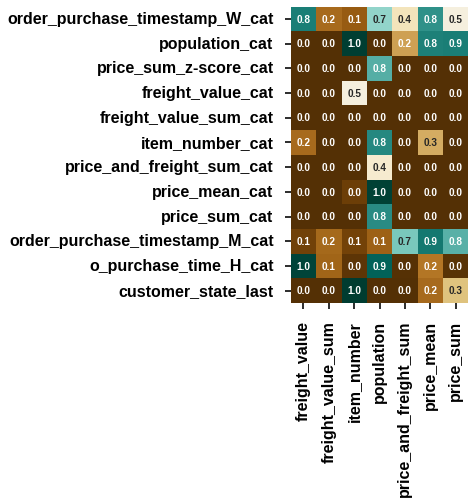

In [100]:
plt.rcParams["figure.figsize"] = [len(lVARS)/2.2,len(lVAR_str_cat)/2.2]
heatmap = sns.heatmap(pUNC,  annot=True, fmt='.1f', cmap='BrBG', cbar=False) #, mask=mask)
plt.savefig(direc0 + '26-pUNC.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')
plt.style.use('seaborn-poster') 

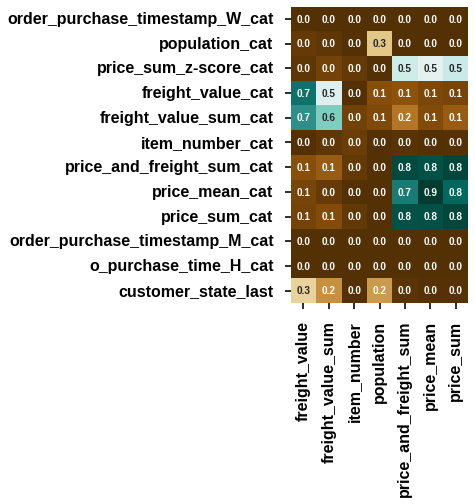

In [101]:
plt.rcParams["figure.figsize"] = [len(lVARS)/2.2,len(lVAR_str_cat)/2.2]
heatmap = sns.heatmap(np2,  annot=True, fmt='.1f', cmap='BrBG', cbar=False) #, mask=mask)
plt.savefig(direc0 + '26-np2.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')
plt.style.use('seaborn-poster') 

#### Correlation Chi-square (Les variables cibles sont continues -> pas faire le chi-square)

In [102]:
chi2 = pd.DataFrame([], index = lVAR_cat, columns = lVAR_cat)
pval = pd.DataFrame([], index = lVAR_cat, columns = lVAR_cat)

for c in lVAR_cat:
    for f in lVAR_cat:
        if c != f:
            expected, observed, stats = pg.chi2_independence(dfTOTAL_cor, x=c, y=f)
            chi2.loc[f,c] = stats['chi2'].loc[0]
            pval.loc[f,c] = stats['pval'].loc[0]

chi2 = chi2.round(2).astype('float16')
pval = pval.round(2).astype('float16')

/home/chispitas/anaconda3/lib/python3.8/site-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))
/home/chispitas/anaconda3/lib/python3.8/site-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))
/home/chispitas/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:6716: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/home/chispitas/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:6716: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/home/chispitas/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:6713: RuntimeWarning: divide by zero encountered in true_divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


/home/chispitas/anaconda3/lib/python3.8/site-packages/matplotlib/colors.py:1202: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


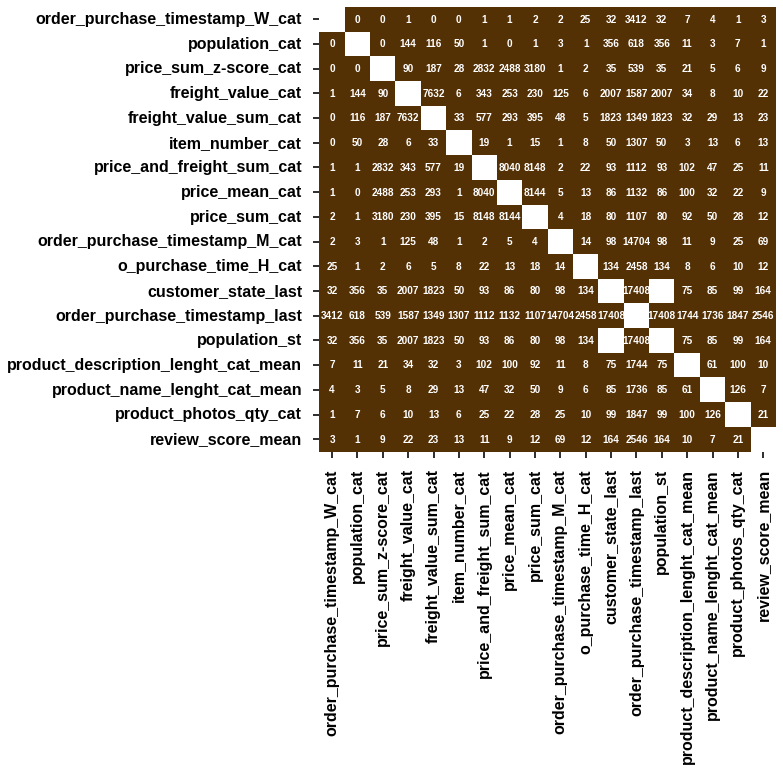

In [103]:
plt.rcParams["figure.figsize"] = [len(lVAR_cat)/2.2,len(lVAR_cat)/2.2]
heatmap = sns.heatmap(chi2,  annot=True, fmt='.0f', cmap='BrBG', cbar=False) #, mask=mask)
plt.savefig(direc0 + '26-chi2_chi2.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

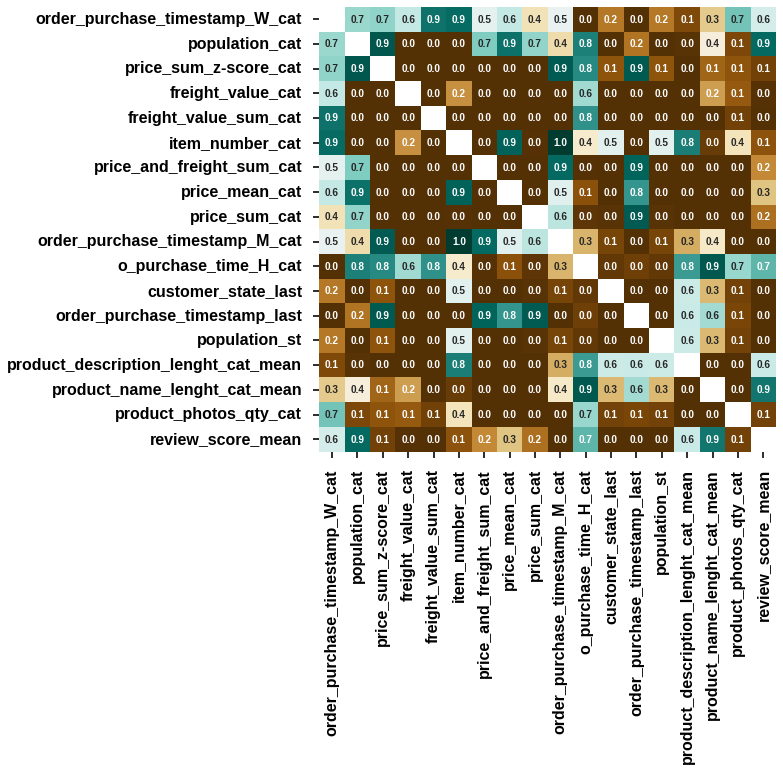

In [104]:
heatmap = sns.heatmap(pval,  annot=True, fmt='.1f', cmap='BrBG', cbar=False) #, mask=mask)
plt.savefig(direc0 + '26-chi2_pval.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

In [105]:
lVAR_cat

array(['order_purchase_timestamp_W_cat', 'population_cat',
       'price_sum_z-score_cat', 'freight_value_cat',
       'freight_value_sum_cat', 'item_number_cat',
       'price_and_freight_sum_cat', 'price_mean_cat', 'price_sum_cat',
       'order_purchase_timestamp_M_cat', 'o_purchase_time_H_cat',
       'customer_state_last', 'order_purchase_timestamp_last',
       'population_st', 'product_description_lenght_cat_mean',
       'product_name_lenght_cat_mean', 'product_photos_qty_cat',
       'review_score_mean'], dtype=object)

CHI2

Les variables AVEC correlation sont:

- CHI2 : 'customer_state_last' and 'freight_value_cat', 'freight_value_sum_cat'
- KW : 'freight_value_cat', 'freight_value_sum_cat' -> Correlé avec var NUM 

- CHI2 : 'o_purchase_time_H_cat', 'order_purchase_timestamp_M_cat', 'order_purchase_timestamp_W_cat'
- KW : 'order_purchase_timestamp_M_cat'  -> Correlé avec var NUM

- CHI2 : 'o_purchase_time_H_cat''order_purchase_timestamp_M_cat', ('order_purchase_timestamp_W_cat') - 'product_name_lenght_cat_mean', 'product_description_lenght_cat_mean' et ('review_score_mean')
- KW : 'product_name_lenght_cat_mean' -> 'product_description_lenght_cat_mean'  -> Plus correlé avec var NUM
- kW : 'review_score_mean' -> Correlé avec var NUM et surtout avec 'population'

- CHI2 : 'price_and_freight_sum_cat', 'price_mean_cat', 'price_sum_cat'
- KW :  'price_sum_cat' -> 'price_mean_cat' ->  'price_and_freight_sum_cat' -> Correlé avec var NUM

r2
Les variables AVEC correlation sont:

- r2 : 'price_mean', 'price_sum', 'price_and_freight_sum'
- KW : 'price_sum', 'price_and_freight_sum' -> Correlé avec var CAT

- r2 : 'freight_value', 'freight_value_sum'
- KW : 'freight_value_sum' -> Correlé avec var CAT

**Les variables SANS correlation sont:**

**- Les variables : 'product_photos_qty_cat' ne sont pas corrélées**



Cadidats pour supression:
- 'order_purchase_timestamp_M_cat' -> Correlé avec var NUM
- 'product_description_lenght_cat_mean' -> Plus correlé avec var NUM

- 'freight_value_cat', 'freight_value_sum_cat' -> Correlé avec var NUM
- 'freight_value_sum' -> Correlé avec var CAT

- 'price_sum_cat' -> 'price_mean_cat' -> 'price_and_freight_sum_cat' -> Correlé avec var NUM
- 'price_sum', 'price_and_freight_sum' -> Correlé avec var CAT


# Export to CSV

In [106]:
dfTOTAL3.columns

Index(['customer_city_last', 'customer_state_last',
       'order_purchase_timestamp_last', 'estimated_delivered_time_mean',
       'review_score_mean', 'price_mean', 'price_sum', 'item_number',
       'freight_value', 'freight_value_sum', 'product_category_name',
       'product_name_lenght_cat_mean', 'product_description_lenght_cat_mean',
       'geolocation_lat_last', 'geolocation_lng_last',
       'product_photos_qty_cat', 'order_purchase_timestamp_M_cat',
       'order_purchase_timestamp_W_cat', 'o_purchase_time_H_cat',
       'price_and_freight_sum', 'population', 'population_st',
       'freight_value_cat', 'freight_value_sum_cat', 'item_number_cat',
       'population_cat', 'price_and_freight_sum_cat', 'price_mean_cat',
       'price_sum_cat', 'price_sum_z-score', 'price_sum_z-score_cat'],
      dtype='object')

In [107]:
lVAR_ML = dfTOTAL3.columns.difference([
    'freight_value_cat', 'freight_value_sum_cat', 'price_sum_cat', 'price_mean_cat',
    'freight_value', 'price_and_freight_sum',
    'item_number', 'price_sum_z-score_cat',
    'customer_city_last', 'population', 'geolocation_lat_last', 'geolocation_lng_last',
    'order_purchase_timestamp_M_cat', 'product_description_lenght_cat_mean' ])
dfML = dfTOTAL3[lVAR_ML]
lVAR_ML

Index(['customer_state_last', 'estimated_delivered_time_mean',
       'freight_value_sum', 'item_number_cat', 'o_purchase_time_H_cat',
       'order_purchase_timestamp_W_cat', 'order_purchase_timestamp_last',
       'population_cat', 'population_st', 'price_and_freight_sum_cat',
       'price_mean', 'price_sum', 'price_sum_z-score', 'product_category_name',
       'product_name_lenght_cat_mean', 'product_photos_qty_cat',
       'review_score_mean'],
      dtype='object')

In [108]:
dfML.to_csv(direc0 + 'dfML.csv', index=True,  encoding='utf-8')

### Link and brush

### Nongraphical techniques

## DATA modeling

### Model and variable selection

### Model execution

### Model diagnostic and model comparison